# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The goal of this prioject is to use data from 2017 & 2018 ACT & SAT scores to identify the state which the College Board should focus it's resources on to improve statewide participation in the SAT test. 

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-&-Cleaning)
- [2018 Data Import & Cleaning](#2018-Data-Import-&-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [107]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [108]:
plt.style.use('fivethirtyeight')

## 2017 Data Import & Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [109]:
#Code:
sat = pd.read_csv("../data/sat_2017.csv")
act = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [110]:
#Code:
sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [111]:
act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [112]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [113]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

The data gives us SAT and ACT participation rates at a state level as well as the average score for each subject in each state. Additionally, the ACT dataset gives us the national participation rate and average scores.

#### 4a. Does the data look complete? 

In [114]:
sat.sort_values('Math').head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
22,Michigan,100%,509,495,1005
9,Florida,83%,520,497,1017
19,Maine,95%,513,499,1012
43,Texas,62%,513,507,1020
6,Connecticut,100%,530,512,1041
10,Georgia,61%,535,515,1050


In [115]:
sat.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [10]:
act.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [11]:
sat.loc[sat['State'] == "Maryland"]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


The data is complete. The SAT dataset consists of 51 rows, with each column having 51 non-null values whilst the ACT dataset has 52 rows each comprising of only non-null values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Using the dataframe describe function, an obvious error in each dataset has been found. The lowest Math score in the SAT dateset is 52. This is obviously an error as the lowest possible score for an SAT paper is 200, according to this site: https://blog.prepscholar.com/whats-the-lowest-sat-score-possible-how-many-get-it

If we check the dataset for any lines with scores below 200, we get the following data:

In [12]:
sat.loc[(sat["Math"]<200)|(sat['Evidence-Based Reading and Writing']<200)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


We can check for any other possible mistakes by finding values that are more than 3 standard deviations away from the mean. I have defined a function to do this for each numeric column in the dataframe.

In [13]:
def check_outliers(df):
    
    cols = {}
    #outliers = []
    for col in df.columns:
       
        outliers = pd.DataFrame()
        if df[col].dtype != "O":
            outliers = df[(df[col] > df[col].mean() + 3 * df[col].std())|(df[col] < df[col].mean() - 3 * df[col].std())]
        else:
            pass
        if len(outliers) != 0:
            cols[col] = [s for s in outliers.index]
    if len(cols) == 0:
        return("No Outliers")
    else:
        for c in cols.keys():
            return("The '{}' column contains outliers at the following index(es): {}".format(c,cols[c]))

In [14]:
check_outliers(sat)

"The 'Math' column contains outliers at the following index(es): [20]"

In [15]:
sat.loc[[20]]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


Function works well as it is giving us the result we had manually identified

In [16]:
check_outliers(act)

"The 'Science' column contains outliers at the following index(es): [21]"

In [17]:
act.loc[[21]]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


The ACT dataset has a simillar error, the science score for Maryland appears to be way to low. The minimum score for each paper for the ACT is 1, whilst the 2.3 score is still above the minimum, it does appear to be an entry error. By checking both error values back to the original data, it appears that both errors are typos. We can fix the data by overwriting our dataframe with the actual data from the website.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [18]:
sat.loc[20,"Math"] = 524
act.loc[21,"Science"] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [19]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [20]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

The Participation data in both datasets are in strings. We need to change this to a float to make sure of the data


#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [21]:
sat.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116


In [22]:
def to_floats(x):
    return float(x.replace("%",""))/100


In [23]:
sat['Participation'] = sat['Participation'].apply(to_floats)
act['Participation'] = act['Participation'].apply(to_floats)

- Fix any individual values preventing other columns from being the appropriate type.

In [24]:
for i in act.index:
    try:
        float(act.loc[i,"Composite"])
    except:
        print(i)


51


In [25]:
act.loc[51,"Composite"] = float(act.loc[51,"Composite"].replace("x",''))

- Finish your data modifications by making sure the columns are now typed appropriately.

In [26]:
#code
act.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [27]:
sat.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

- Display the data types again to confirm they are correct.

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [28]:
#code
act.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [29]:
sat.rename(columns={'State':'state','Participation':"sat_participation_2017",'Evidence-Based Reading and Writing':'sat_reading_writing_2017',"Math":'sat_math_2017','Total':"sat_total_2017"},inplace=True)

In [30]:
act.rename(columns={'State':'state','Participation':"act_participation_2017","English":"act_english_2017","Math":'act_math_2017',"Reading":"act_reading_2017","Science":'act_science_2017','Composite':"act_composite_2017"},inplace=True)

In [31]:
act.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT&SAT|The state which is represented by data in this row| 
|act_participation_2017|Float|ACT|State level Participation rate of the ACT| 
|act_english_2017|Float|ACT|State level average score in English paper| 
|act_math_2017 |Float|ACT|State level average score in Math paper| 
|act_reading_2017|Float|ACT|State level average score in Reading paper| 
|act_science_2017|Float|ACT|State level average score in Science paper| 
|act_composite_2017|Float|ACT|State level Composite average score| 
|sat_participation_2017|Float|SAT|State level Participation rate of the SAT|
|sat_reading_writing_2017|Int|SAT|State level average score in the Reading & Writing paper|
|sat_reading_writing_2017|Int|SAT|State level average score in the Math paper|
|sat_math_2017|Int|SAT|State level average score in the Reading & Writing paper|
|sat_total_2017|Int|SAT|State level average Total score|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [32]:
#code
act.drop(0,inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [33]:
#Code:
comb_2017 = sat.merge(act,left_on='state',right_on='state',how='left')

In [34]:
comb_2017.head()

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [35]:
#code
comb_2017.to_csv("combined_2017.csv",index=False)

## 2018 Data Import & Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [36]:
sat_2018 = pd.read_csv("2018_sat.csv")
act_2018 = pd.read_csv("../data/act_2018_updated.csv")

In [37]:
sat_2018.columns = sat_2018.iloc[0]
sat_2018.drop(0,inplace=True)

In [38]:
check_outliers(act_2018)

'No Outliers'

In [39]:
check_outliers(sat_2018)

'No Outliers'

In [40]:
sat_2018.head(2)

,State,ERW*,Mathematics,SAT,Taking SAT
1,Alabama,595,571,1166,6
2,Alaska,562,544,1106,43


In [41]:
sat_2018.rename(columns={'State':'state','Taking SAT':"sat_participation_2018",'ERW*':'sat_reading_writing_2018',"Mathematics":'sat_math_2018','SAT':"sat_total_2018"},inplace=True)

In [42]:
act_2018.rename(columns={'State':'state','Percentage of Students Tested':"act_participation_2018","Average English Score":"act_english_2018","Average Math Score":'act_math_2018',"Average Reading Score":"act_reading_2018","Average Science Score":'act_science_2018','Average Composite Score':"act_composite_2018"},inplace=True)


In [43]:
comb_2018 = sat_2018.merge(act_2018,left_on='state',right_on='state',how='left')

In [44]:
comb_2018.head()

,state,sat_reading_writing_2018,sat_math_2018,sat_total_2018,sat_participation_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,595,571,1166,6,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,562,544,1106,43,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,577,572,1149,29,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,592,576,1169,5,100.0,19.4,19.1,18.9,19.7,19.4
4,California,540,536,1076,60,27.0,22.7,22.5,22.5,23.0,22.1


In [45]:
comb_2018['act_participation_2018'] = comb_2018['act_participation_2018']/100 #2018 ACT participation rate is not in decimal form like the others

Some states have legislation that makes it compulsory for students to complete either test when they graduate from high school. This data will be useful in making our reccomendations to the college board. The following code extracts a table of this data from this website: 

https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/

In [46]:

from selenium import webdriver

# specify the url
urlpage = 'https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/' 
#print(urlpage)

#driver = webdriver.Chrome("/Users/ganeshsivam/Downloads/chromed")
driver = webdriver.Chrome("E:/software/chromedriver.exe")
driver.get(urlpage)
SMRtable = driver.find_element_by_id("tablepress-108")
states = []
for i in SMRtable.find_elements_by_tag_name("tbody")[0].find_elements_by_class_name("column-1"):
    states.append(i.get_attribute("innerHTML"))
required_test = []
for i in SMRtable.find_elements_by_tag_name("tbody")[0].find_elements_by_class_name("column-2"):
    required_test.append(i.get_attribute("innerHTML"))
d = dict(zip(states,required_test))
d = pd.DataFrame(data=d.values(),index = d.keys(),columns=['Test Required'])
d.to_csv("required_test.csv")
d = d.reset_index().rename(columns={'index':'state'})

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [47]:
comb = comb_2017.merge(comb_2018,left_on="state",right_on='state',how='left')

In [48]:
comb["sat_participation_2018"] =comb["sat_participation_2018"].apply(to_floats)


In [49]:
comb = comb.merge(d,left_on='state',right_on='state',how='left')

In [50]:
def clean(t):
    if t == "ACT":
        val = 1
    elif t == "SAT":
        val = 2
    elif t == "SAT or ACT":
        val = 3
    else:
        val =0
    return val 


In [51]:
comb['Test Required'] = comb['Test Required'].apply(clean) 

The above function maps the Test Required column according to the following values: <br>
ACT only mandatory : 1<br>
SAT only mandatory : 2<br>
Either SAT or ACT mandatory : 3<br>
Neither mandatory : 0<br>

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [52]:
#Code:
comb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_reading_writing_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_participation_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_english_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_reading_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_science_2017,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
sat_participation_2018,51.0,0.466275,0.380142,0.02,0.045,0.52,0.795,1.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [53]:
#code
def std_dev(col):
    var = 0
    try:
        m = np.mean(col)
    except:
        return ("{} not working".format(col))
    n = len(col)
    for c in col:
        x = ((c-m)**2)/n
        var += x
    std = np.sqrt(var)
    return std

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [54]:
comb.head()

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_math_2018,sat_total_2018,sat_participation_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,Test Required
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,571,1166,0.06,1.00,19.1,18.9,18.3,19.6,19.0,1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,544,1106,0.43,0.33,20.8,19.8,20.6,21.6,20.7,0
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,572,1149,0.29,0.66,19.2,18.2,19.4,19.5,19.2,0
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,576,1169,0.05,1.00,19.4,19.1,18.9,19.7,19.4,0
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,536,1076,0.60,0.27,22.7,22.5,22.5,23.0,22.1,0


In [55]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 22 columns):
state                       51 non-null object
sat_participation_2017      51 non-null float64
sat_reading_writing_2017    51 non-null int64
sat_math_2017               51 non-null int64
sat_total_2017              51 non-null int64
act_participation_2017      51 non-null float64
act_english_2017            51 non-null float64
act_math_2017               51 non-null float64
act_reading_2017            51 non-null float64
act_science_2017            51 non-null float64
act_composite_2017          51 non-null object
sat_reading_writing_2018    51 non-null object
sat_math_2018               51 non-null object
sat_total_2018              51 non-null object
sat_participation_2018      51 non-null float64
act_participation_2018      51 non-null float64
act_composite_2018          51 non-null float64
act_english_2018            51 non-null float64
act_math_2018               51 non-null floa

In [56]:
std_dev(comb['sat_participation_2018'])

0.3763965409204986

In [57]:
comb['act_composite_2017'] = comb['act_composite_2017'].astype(float)
comb['sat_reading_writing_2018'] = comb['sat_reading_writing_2018'].astype(float)
comb['sat_math_2018'] = comb['sat_math_2018'].astype(float)
comb['sat_total_2018'] = comb['sat_total_2018'].astype(float)

In [58]:
#Code:
my_std = {x:y for x,y in zip(comb.columns[1:],[round(std_dev(comb[c]),5) for c in comb.columns if c != "state"])}

In [59]:
my_std

{'sat_participation_2017': 0.34929,
 'sat_reading_writing_2017': 45.21697,
 'sat_math_2017': 46.65713,
 'sat_total_2017': 91.58351,
 'act_participation_2017': 0.31824,
 'act_english_2017': 2.33049,
 'act_math_2017': 1.96246,
 'act_reading_2017': 2.0469,
 'act_science_2017': 1.72222,
 'act_composite_2017': 2.00079,
 'sat_reading_writing_2018': 44.87119,
 'sat_math_2018': 48.4059,
 'sat_total_2018': 92.94372,
 'sat_participation_2018': 0.3764,
 'act_participation_2018': 0.33745,
 'act_composite_2018': 2.08553,
 'act_english_2018': 2.42225,
 'act_math_2018': 2.01571,
 'act_reading_2018': 2.14589,
 'act_science_2018': 1.85169,
 'Test Required': 0.92011}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [60]:
pd_std = dict(round(comb.describe().loc['std'],5))

In [61]:
np_std = {x:y for x,y in zip(comb.columns[1:],[round(np.std(comb[c]),5) for c in comb.columns if c != "state"])}

In [62]:
my_std == np_std

True

In [63]:
my_std == pd_std

False

The standard deviation function I created matches the output using numpy's std method but differs from the standard deviation from pandas describe. According to the respective documentaion, Numpy's std function uses a default Delta Degrees of Freedom (DDOF) of 0 whilst Pandas uses a default DDOF of 1.My function used a DDOF of 0, thus it matches calculation done by np.std

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [64]:
#code
def high_low(col,h,form='{:.1%}'):
    if h.lower() == "highest":
        p =False
    elif h.lower() == "lowest":
        p =True

    c = comb.copy()
    
    x,y = c.sort_values(col,ascending=p).reset_index().loc[0,'state'],form.format(c.sort_values(col,ascending=p).reset_index().loc[0,col])
    #y = 
    print("State with {} rate for {} is: {} with a rate of {}".format(h,col,x,y))

In [65]:
parts = ['sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']
stat = ['highest','lowest']
for part in parts:
    for s in stat:
        high_low(part,s)

State with highest rate for sat_participation_2017 is: District of Columbia with a rate of 100.0%
State with lowest rate for sat_participation_2017 is: North Dakota with a rate of 2.0%
State with highest rate for sat_participation_2018 is: Colorado with a rate of 100.0%
State with lowest rate for sat_participation_2018 is: North Dakota with a rate of 2.0%
State with highest rate for act_participation_2017 is: Alabama with a rate of 100.0%
State with lowest rate for act_participation_2017 is: Maine with a rate of 8.0%
State with highest rate for act_participation_2018 is: Alabama with a rate of 100.0%
State with lowest rate for act_participation_2018 is: Maine with a rate of 7.0%


In [66]:
comb.head()

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_math_2018,sat_total_2018,sat_participation_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,Test Required
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,571.0,1166.0,0.06,1.00,19.1,18.9,18.3,19.6,19.0,1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,544.0,1106.0,0.43,0.33,20.8,19.8,20.6,21.6,20.7,0
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,572.0,1149.0,0.29,0.66,19.2,18.2,19.4,19.5,19.2,0
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,576.0,1169.0,0.05,1.00,19.4,19.1,18.9,19.7,19.4,0
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,536.0,1076.0,0.60,0.27,22.7,22.5,22.5,23.0,22.1,0


In [67]:
comb.columns

Index(['state', 'sat_participation_2017', 'sat_reading_writing_2017',
       'sat_math_2017', 'sat_total_2017', 'act_participation_2017',
       'act_english_2017', 'act_math_2017', 'act_reading_2017',
       'act_science_2017', 'act_composite_2017', 'sat_reading_writing_2018',
       'sat_math_2018', 'sat_total_2018', 'sat_participation_2018',
       'act_participation_2018', 'act_composite_2018', 'act_english_2018',
       'act_math_2018', 'act_reading_2018', 'act_science_2018',
       'Test Required'],
      dtype='object')

In [68]:
comb.head()

,state,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_math_2018,sat_total_2018,sat_participation_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,Test Required
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,571.0,1166.0,0.06,1.00,19.1,18.9,18.3,19.6,19.0,1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,544.0,1106.0,0.43,0.33,20.8,19.8,20.6,21.6,20.7,0
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,572.0,1149.0,0.29,0.66,19.2,18.2,19.4,19.5,19.2,0
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,576.0,1169.0,0.05,1.00,19.4,19.1,18.9,19.7,19.4,0
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,536.0,1076.0,0.60,0.27,22.7,22.5,22.5,23.0,22.1,0


In [69]:
tots = ['act_composite_2017','sat_total_2017','act_composite_2018','sat_total_2018']
for tot in tots:
    for s in stat:
        high_low(tot,s,form ='{:.2f}')

State with highest rate for act_composite_2017 is: New Hampshire with a rate of 25.50
State with lowest rate for act_composite_2017 is: Nevada with a rate of 17.80
State with highest rate for sat_total_2017 is: Minnesota with a rate of 1295.00
State with lowest rate for sat_total_2017 is: District of Columbia with a rate of 950.00
State with highest rate for act_composite_2018 is: Connecticut with a rate of 25.60
State with lowest rate for act_composite_2018 is: Nevada with a rate of 17.70
State with highest rate for sat_total_2018 is: Minnesota with a rate of 1298.00
State with lowest rate for sat_total_2018 is: District of Columbia with a rate of 977.00


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [70]:
comb.describe()

,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_math_2018,sat_total_2018,sat_participation_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,Test Required
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,...,557.254902,1124.666667,0.466275,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098,0.764706
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,...,48.887562,93.868561,0.380142,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114,0.929263
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,...,480.000000,977.000000,0.020000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000,0.000000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,...,521.500000,1062.500000,0.045000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000,0.000000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,...,547.000000,1099.000000,0.520000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000,0.000000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,...,600.500000,1220.000000,0.795000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000,1.000000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,...,655.000000,1298.000000,1.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000,3.000000


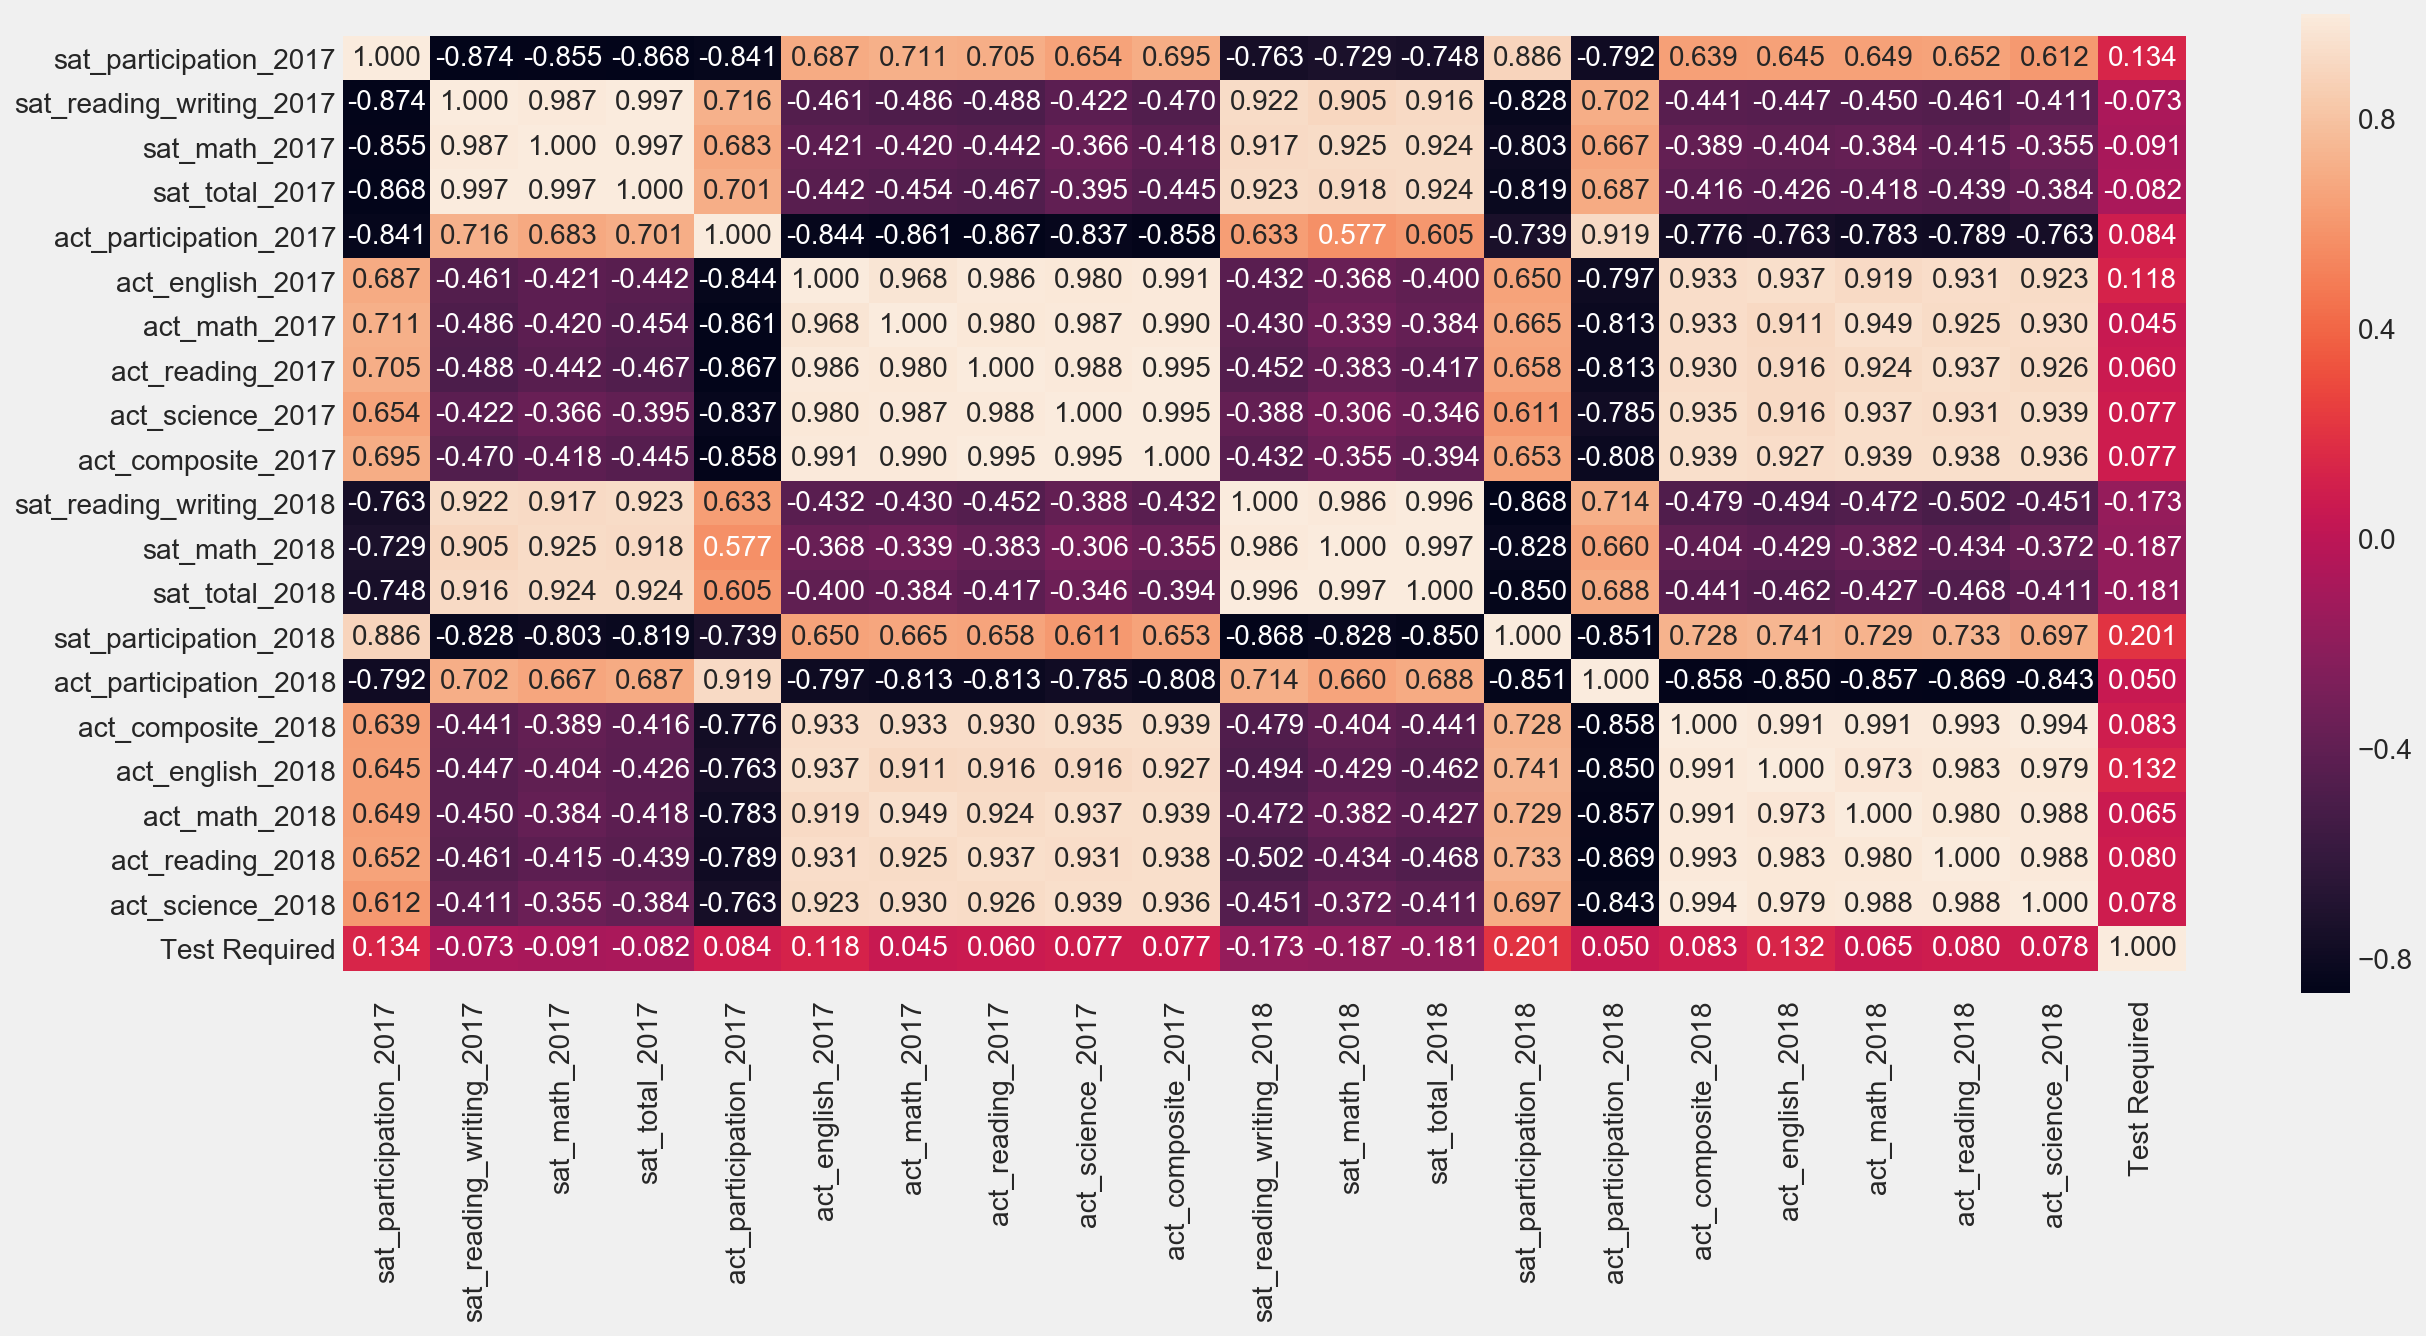

In [71]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(comb.corr(),robust=True,annot=True,fmt= ".3f")
bottom, top = ax.get_ylim()
sns.set(font_scale=1.7)
#sns.set(font_scale=1.65)
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.gcf().subplots_adjust(bottom=0.20,left=0.15)
plt.savefig("heatmap.png")

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [72]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels,x=9,y=10):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(x,y)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        #print(ax[i])
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel([list_of_xlabels[i]])
        ax[i].set_ylabel('No. of states')

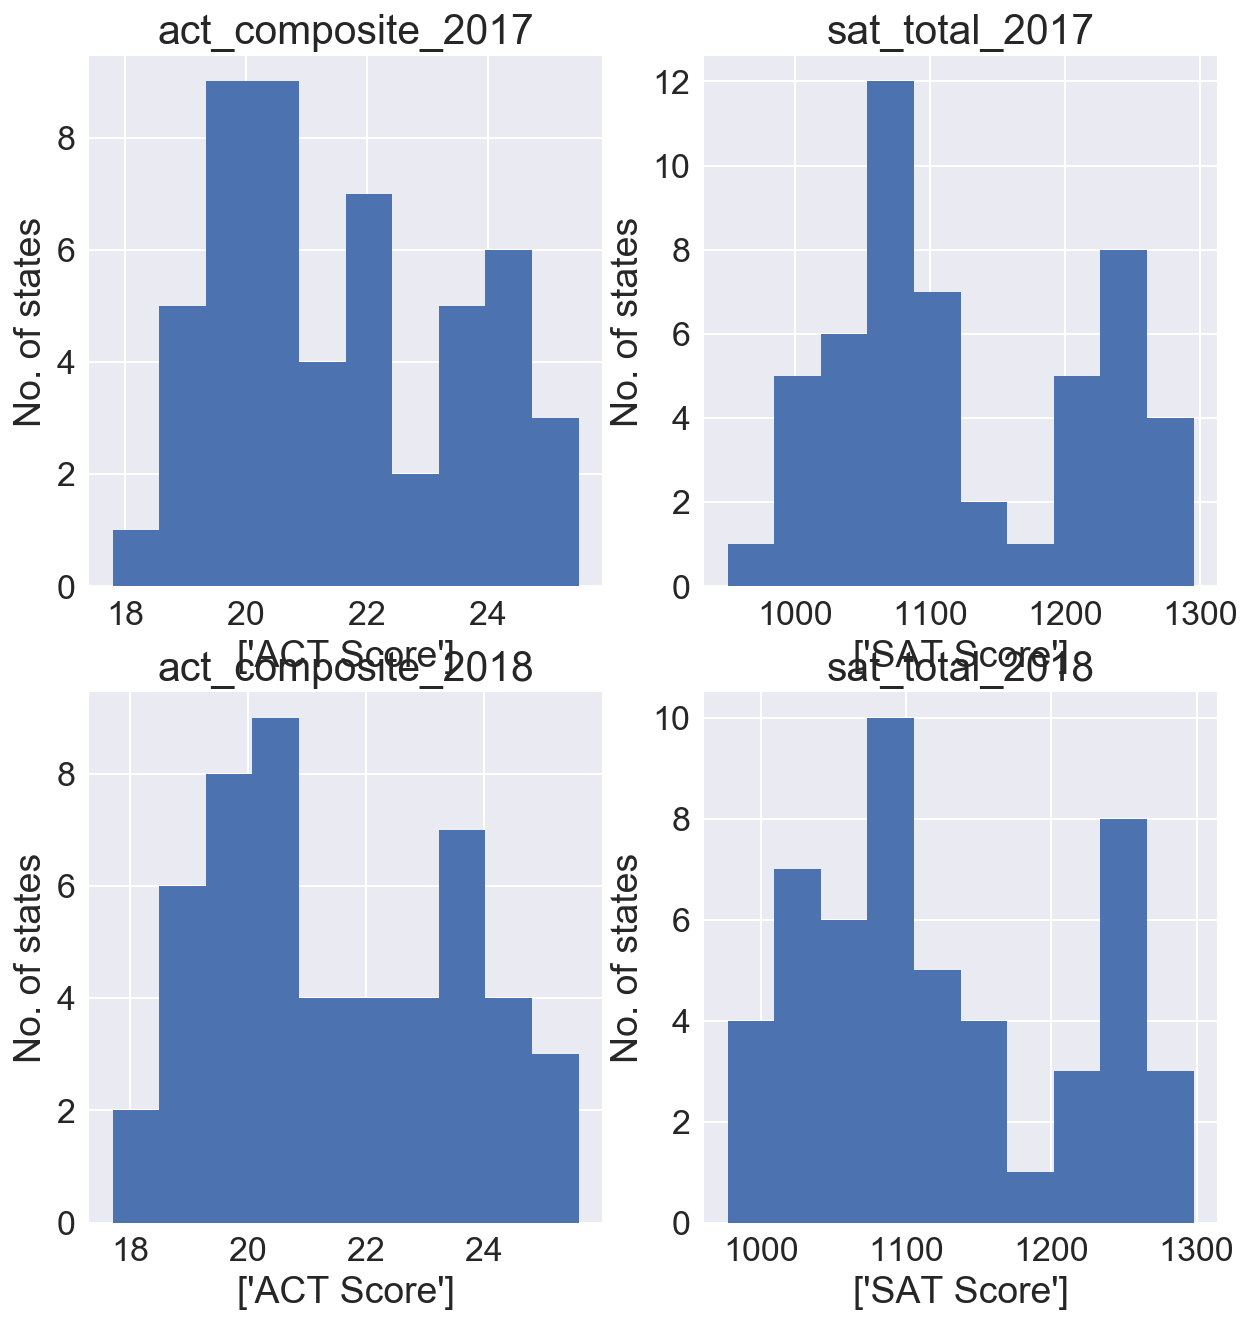

In [73]:
subplot_histograms(comb,['act_composite_2017','sat_total_2017','act_composite_2018','sat_total_2018'],['act_composite_2017','sat_total_2017','act_composite_2018','sat_total_2018'],["ACT Score","SAT Score","ACT Score","SAT Score"])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [74]:
comb.columns

Index(['state', 'sat_participation_2017', 'sat_reading_writing_2017',
       'sat_math_2017', 'sat_total_2017', 'act_participation_2017',
       'act_english_2017', 'act_math_2017', 'act_reading_2017',
       'act_science_2017', 'act_composite_2017', 'sat_reading_writing_2018',
       'sat_math_2018', 'sat_total_2018', 'sat_participation_2018',
       'act_participation_2018', 'act_composite_2018', 'act_english_2018',
       'act_math_2018', 'act_reading_2018', 'act_science_2018',
       'Test Required'],
      dtype='object')

### Reading 

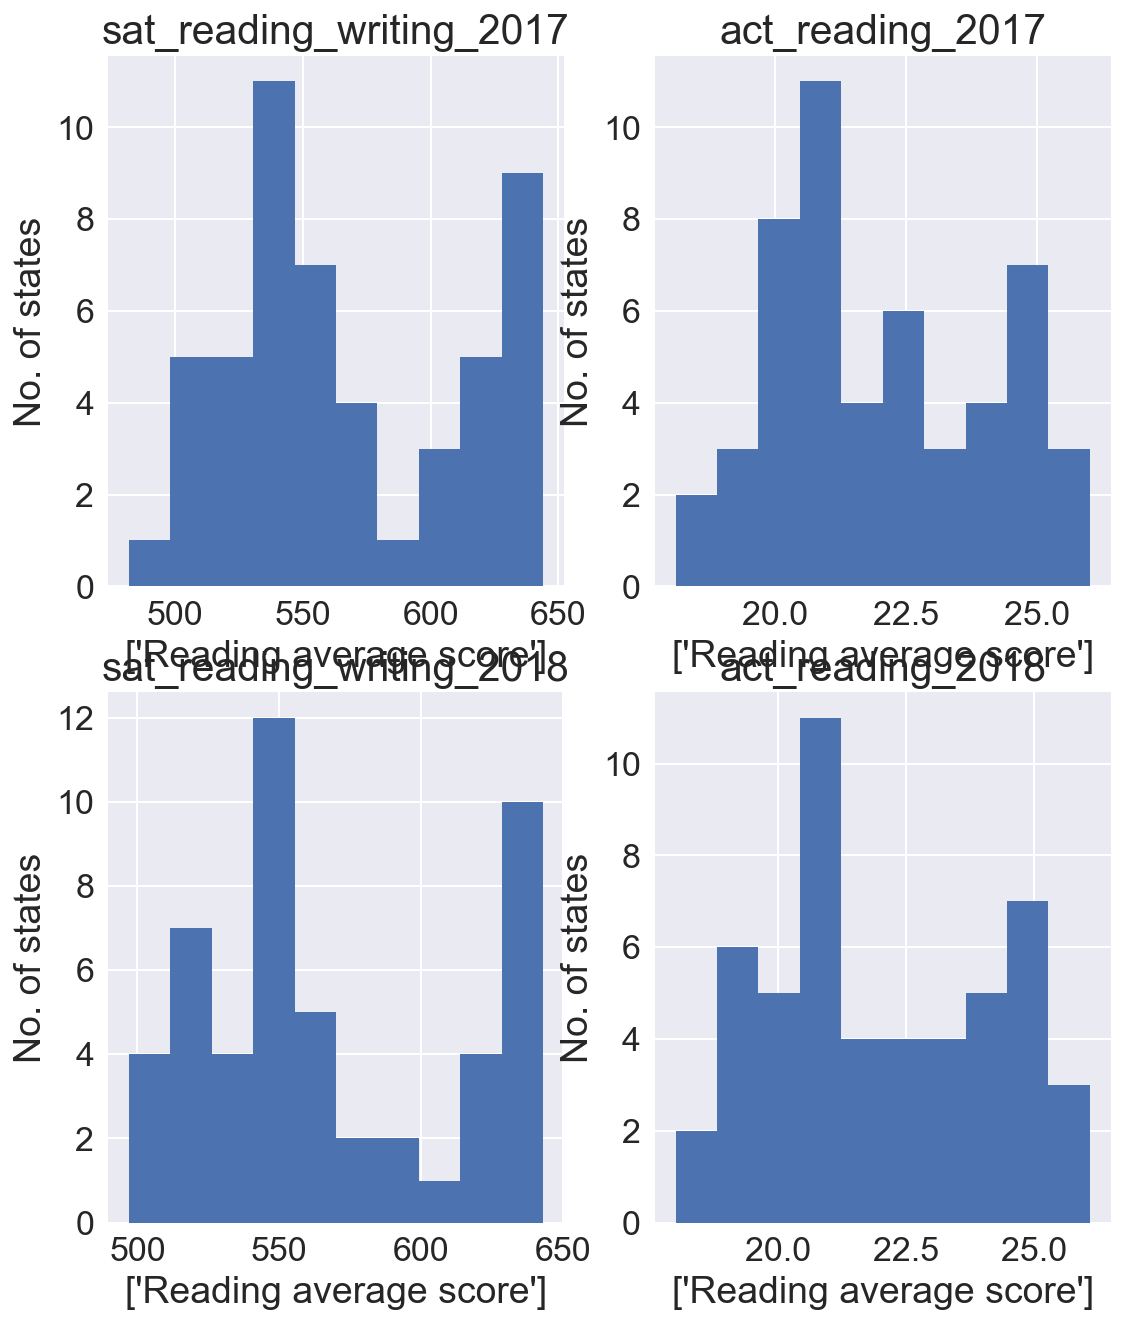

In [75]:
reading = [x for x in comb.columns if "reading" in x]
xlabel = ['Reading average score' for i in range(4)]
subplot_histograms(comb,reading,reading,xlabel, 8,10)

### Math scores

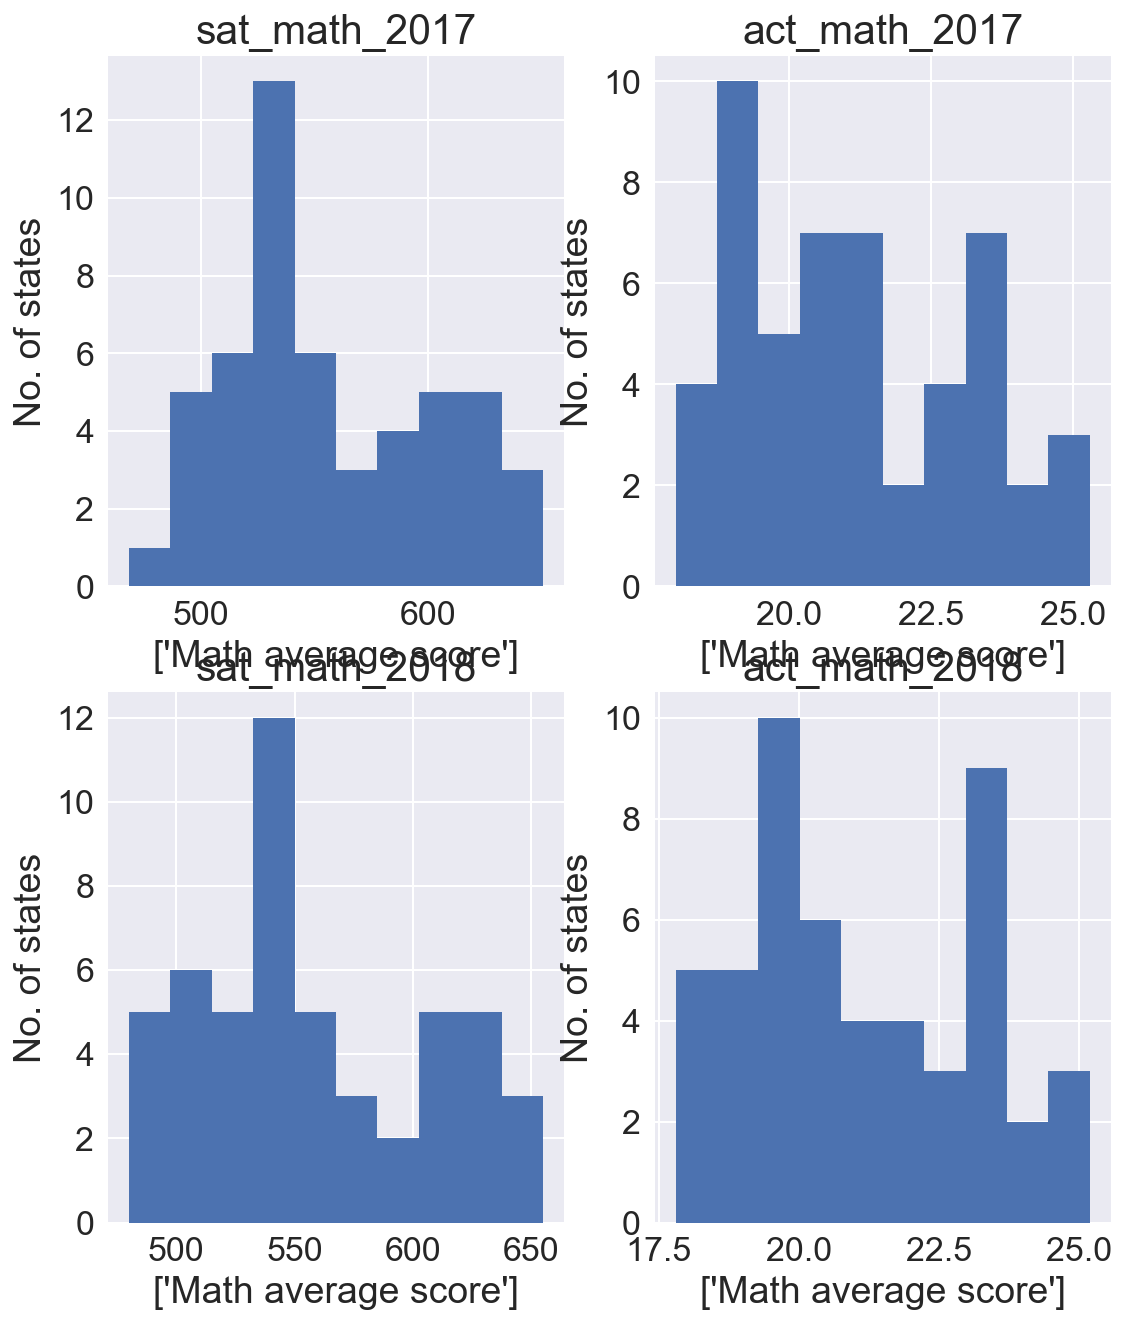

In [76]:
math = [x for x in comb.columns if "math" in x]
xlabel = ['Math average score' for i in range(4)]
subplot_histograms(comb,math,math,xlabel, 8,10)

SAT math scores seem to have deproved from 2017 to 2018, with the lower bands making up a larger proportion in 2018. For the ACT, the middle bands have increased with the upper and lower bands seeing slight decreases

### SAT vs ACT Participation rates

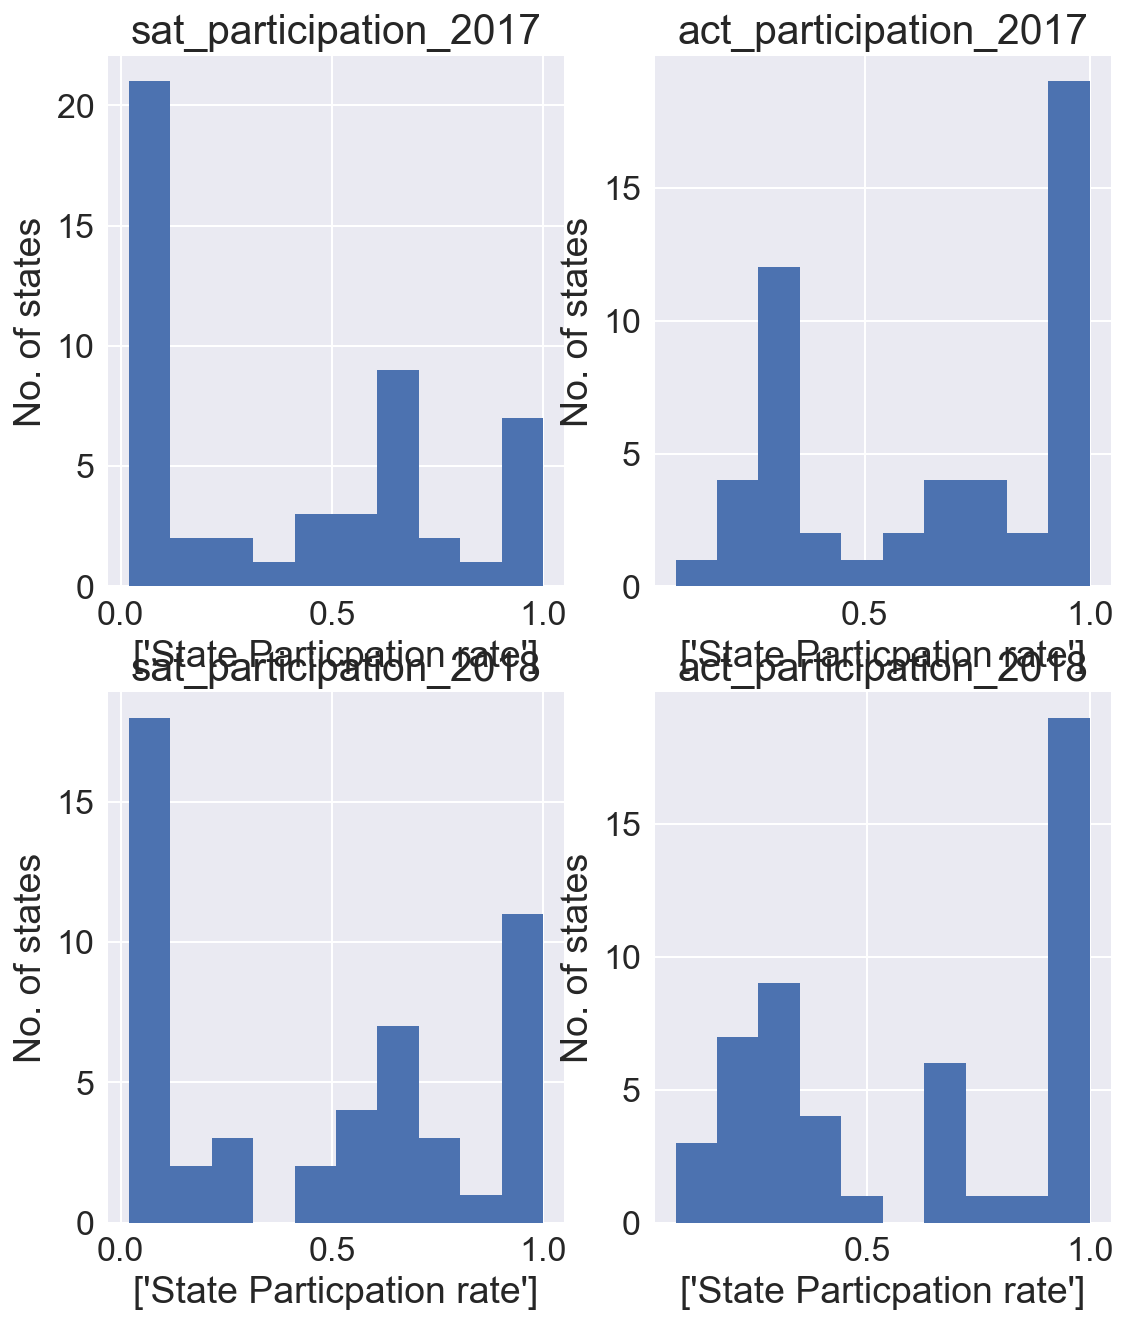

In [77]:

cols = ['sat_participation_2017','act_participation_2017','sat_participation_2018',
       'act_participation_2018']
xlabel = ['State Particpation rate' for i in range(4)]
subplot_histograms(comb,cols,cols,xlabel, 8,10)

For the SAT, in both years, the band where most states fall into is 0-0.1 whilst for the ACT it has been 0.9-1. This is indicative of the ACT outperforming the SAT. But from 2017 to 2018, the number of stats in the lowest band for the SAT has decreased, whilst the number in the highest band has increased. This upward trend indicates that the changes made to the test from 2016 are helping to improve participation rates. 

In [78]:
comb.describe()

,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,...,sat_math_2018,sat_total_2018,sat_participation_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,Test Required
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,...,557.254902,1124.666667,0.466275,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098,0.764706
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,...,48.887562,93.868561,0.380142,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114,0.929263
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,...,480.000000,977.000000,0.020000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000,0.000000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,...,521.500000,1062.500000,0.045000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000,0.000000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,...,547.000000,1099.000000,0.520000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000,0.000000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,...,600.500000,1220.000000,0.795000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000,1.000000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,...,655.000000,1298.000000,1.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000,3.000000


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


To compare text scores between ACT & SAT, we need to conver each relevant column to a percentage of the maximum score for that test.

In [79]:
comb[['sat_math_2017','sat_reading_writing_2017','sat_math_2018','sat_reading_writing_2018']] = comb[['sat_math_2017','sat_reading_writing_2017','sat_math_2018','sat_reading_writing_2018']]/800

In [80]:
comb[['act_english_2017', 'act_math_2017', 'act_reading_2017',
       'act_science_2017','act_english_2018',
       'act_math_2018', 'act_reading_2018', 'act_science_2018']] = comb[['act_english_2017', 'act_math_2017', 'act_reading_2017',
       'act_science_2017','act_english_2018',
       'act_math_2018', 'act_reading_2018', 'act_science_2018']]/36

In [81]:
comb[['sat_total_2017','sat_total_2018']] = comb[['sat_total_2017','sat_total_2018']]/1600
comb[['act_composite_2017','act_composite_2018']] = comb[['act_composite_2017','act_composite_2018']]/36

In [82]:
def scatter(dataframe,list_cols,title,ylabel,x=10,y=10):
    cols = list_cols
    fig, ax = plt.subplots(figsize=(x,y)) 
    jet=plt.get_cmap('jet')
    colors = ['red','green','blue','yellow','purple','orange']
    #ax.legend()
    leg = ax.get_legend()
    for i in range(len(list_cols)):
        
        ax.scatter(comb.index,comb[cols[i]],s=200, c=[colors[i] for x in range(len(comb[cols[i]]))],marker="1",label=cols[i] ,vmin=1, vmax=5, cmap=jet)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(loc="upper left")
    leg = ax.get_legend()
    for i in range(len(list_cols)):
        leg.legendHandles[i].set_color(colors[i])
        
        
        

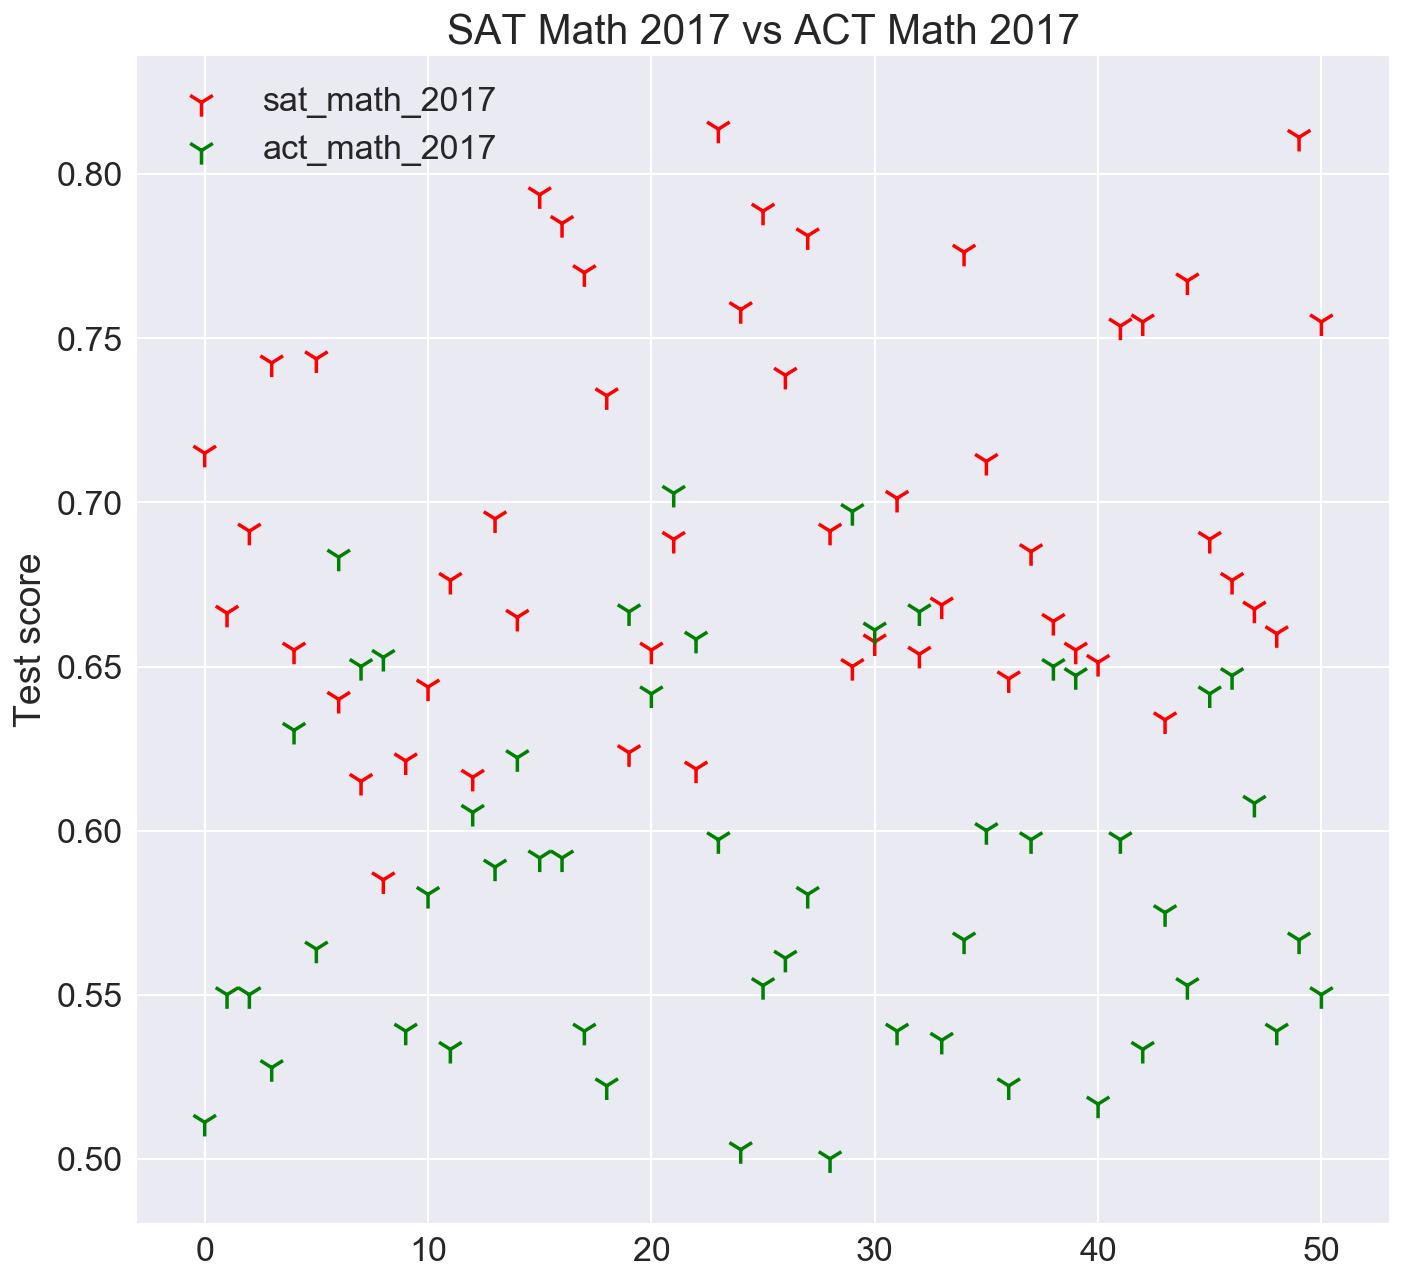

In [83]:
scatter(comb,['sat_math_2017','act_math_2017'],"SAT Math 2017 vs ACT Math 2017","Test score")

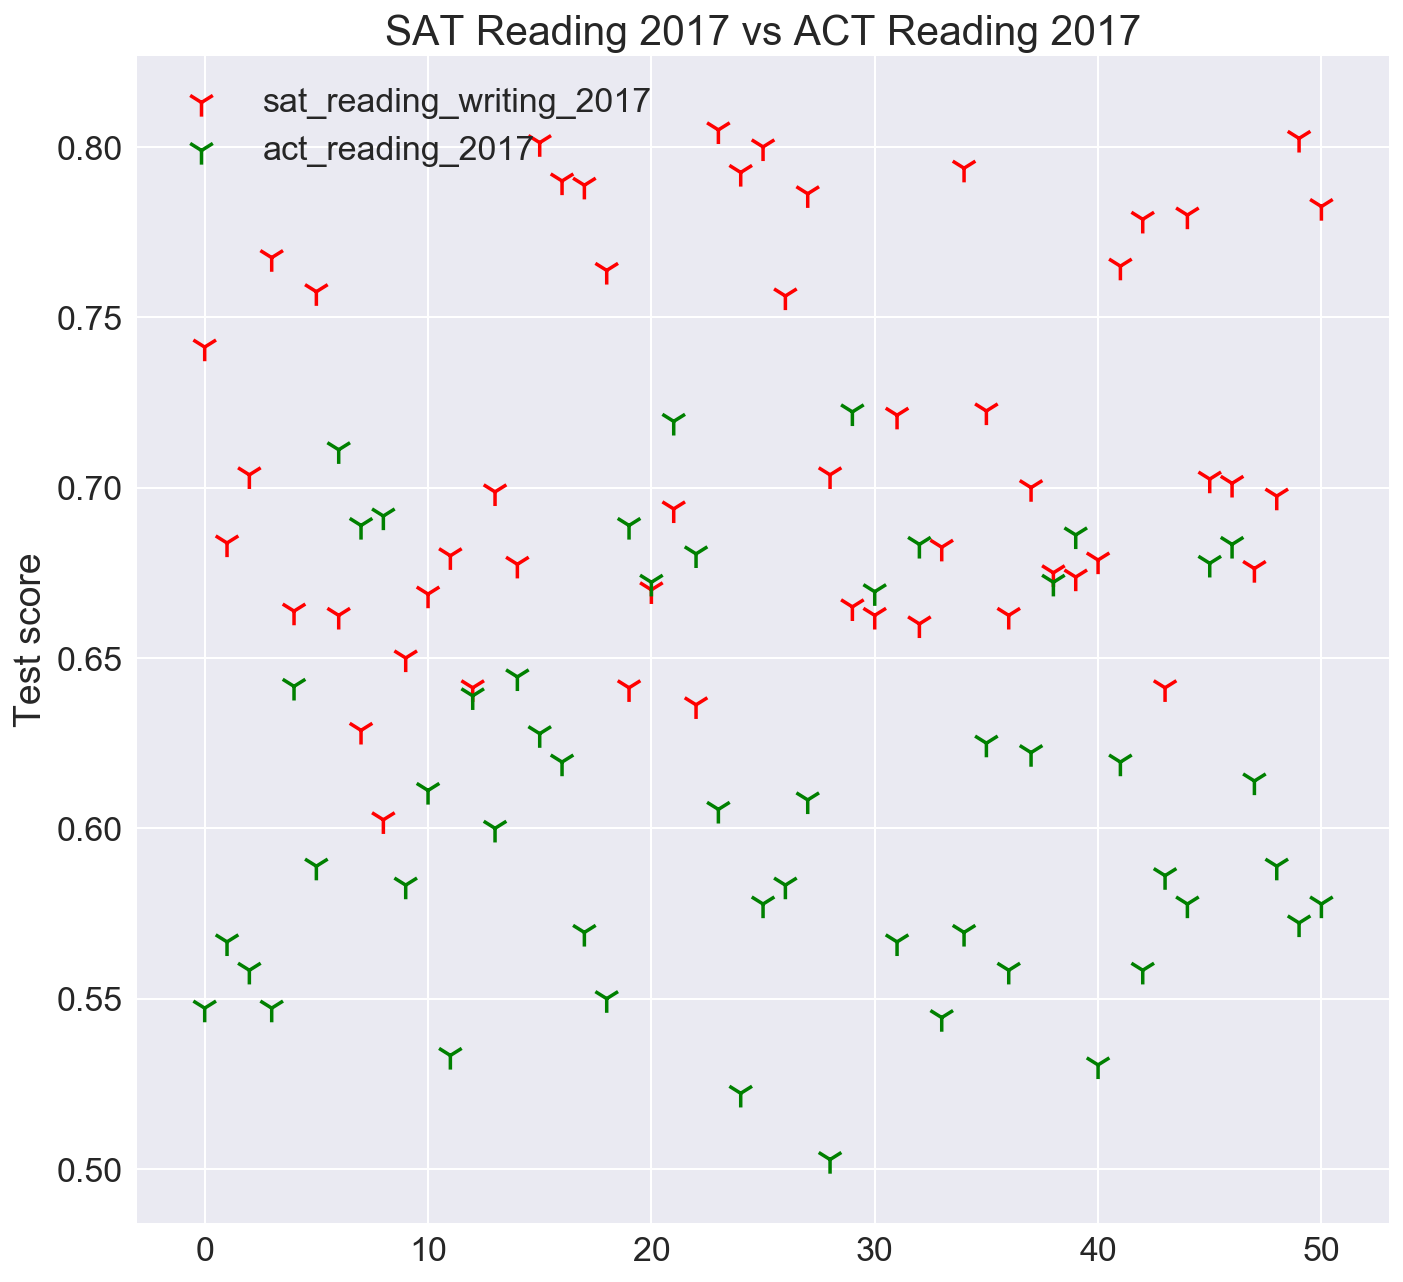

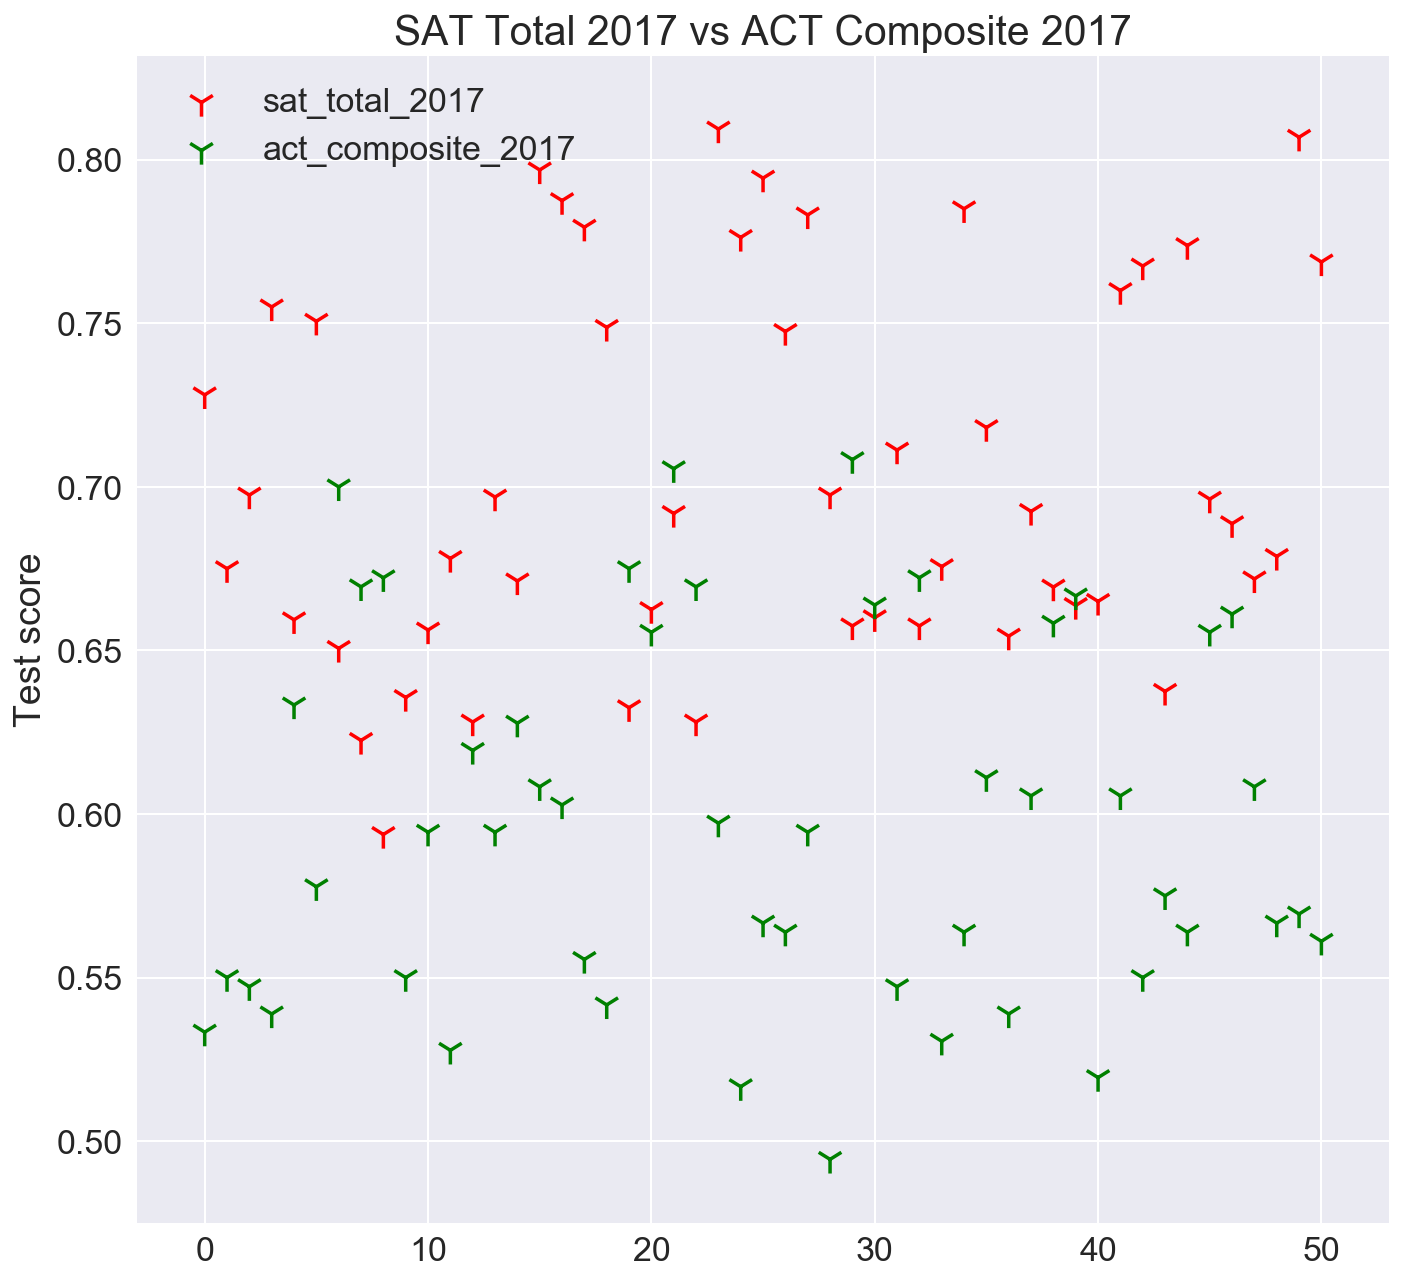

In [84]:
scatter(comb,['sat_reading_writing_2017','act_reading_2017'],"SAT Reading 2017 vs ACT Reading 2017","Test score")
scatter(comb,['sat_total_2017','act_composite_2017'],"SAT Total 2017 vs ACT Composite 2017","Test score")


For 2017 Math, Reading and Total/Composite, the SAT scores are generally higher than the ACT. This suggests that participation rates are negatively correlated with test scores. We have seen that this is also the case from the heatmap plotted earlier. Next we will plot the 2017 SAT/ACT Totals compared with 2018 totals. 

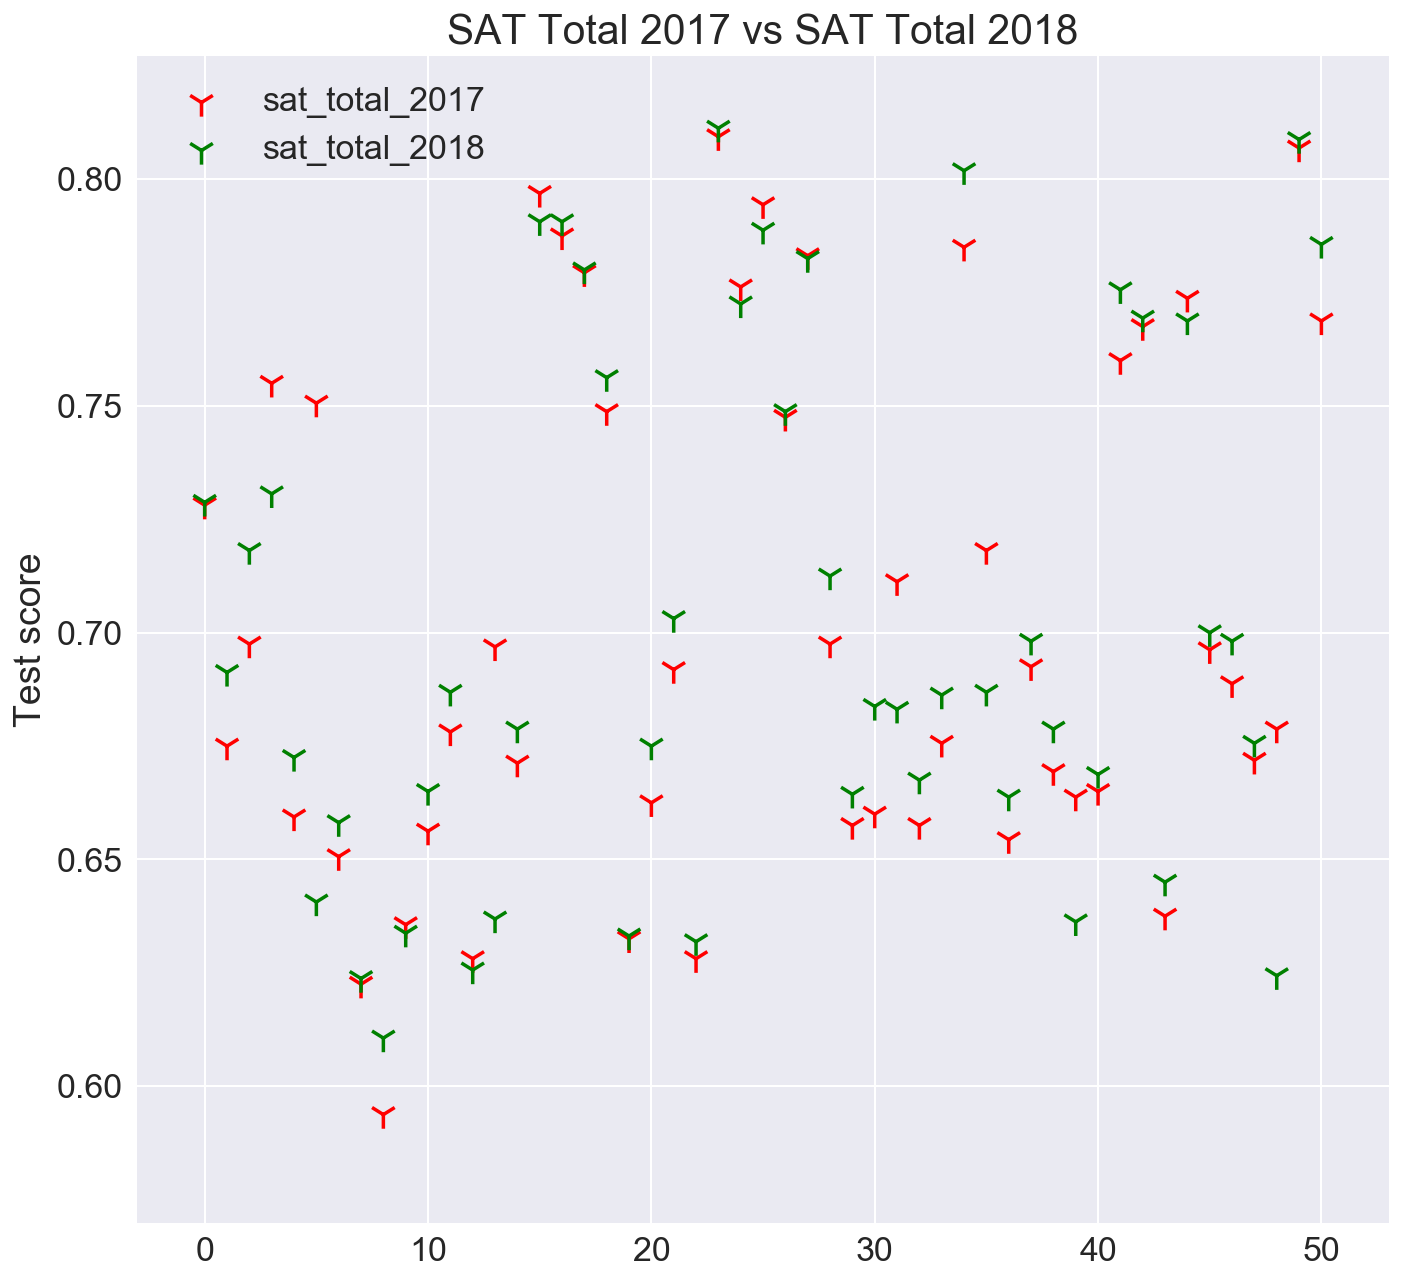

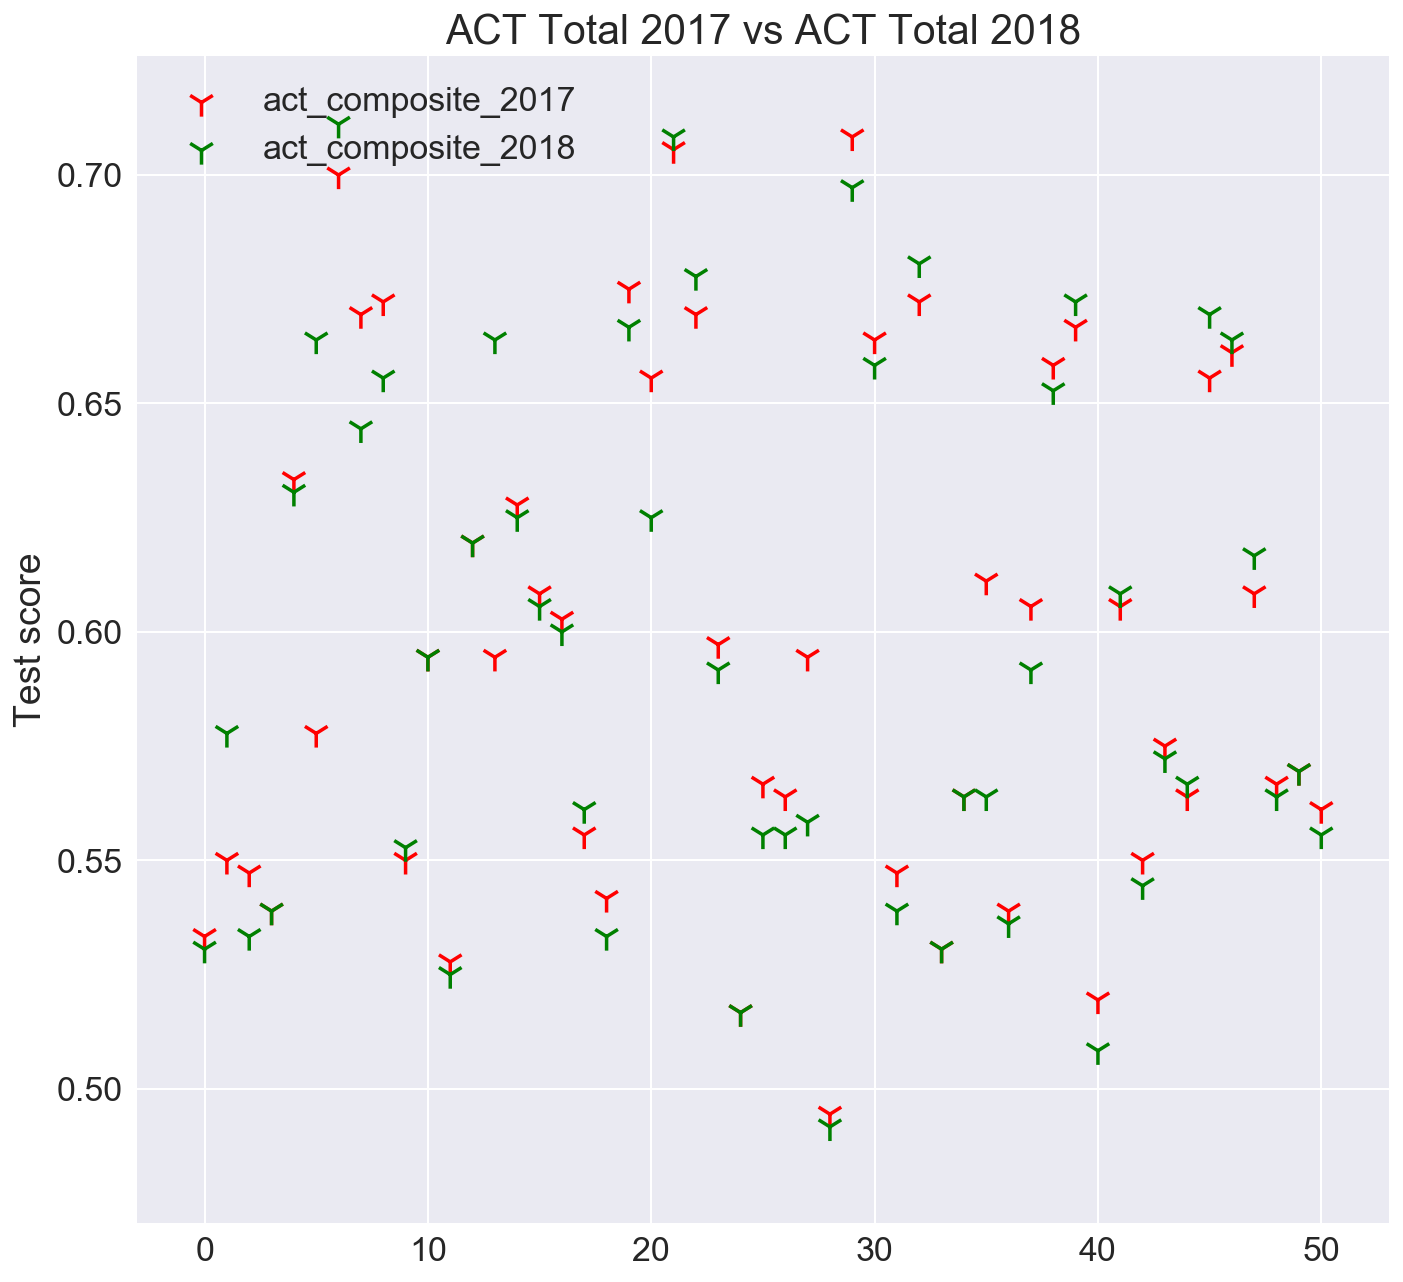

In [85]:
scatter(comb,['sat_total_2017','sat_total_2018'],"SAT Total 2017 vs SAT Total 2018","Test score")
scatter(comb,['act_composite_2017','act_composite_2018'],"ACT Total 2017 vs ACT Total 2018","Test score")

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [86]:
def box_plot(df, cols, title,x=10,y=10):
    fig, ax =plt.subplots(figsize=(x,y))
    ax=sns.boxplot(data=comb[cols])
    ax.set_title(title)
    #ax.set_xlabel(cols,fontsize=15)
    sns.set(font_scale=1)

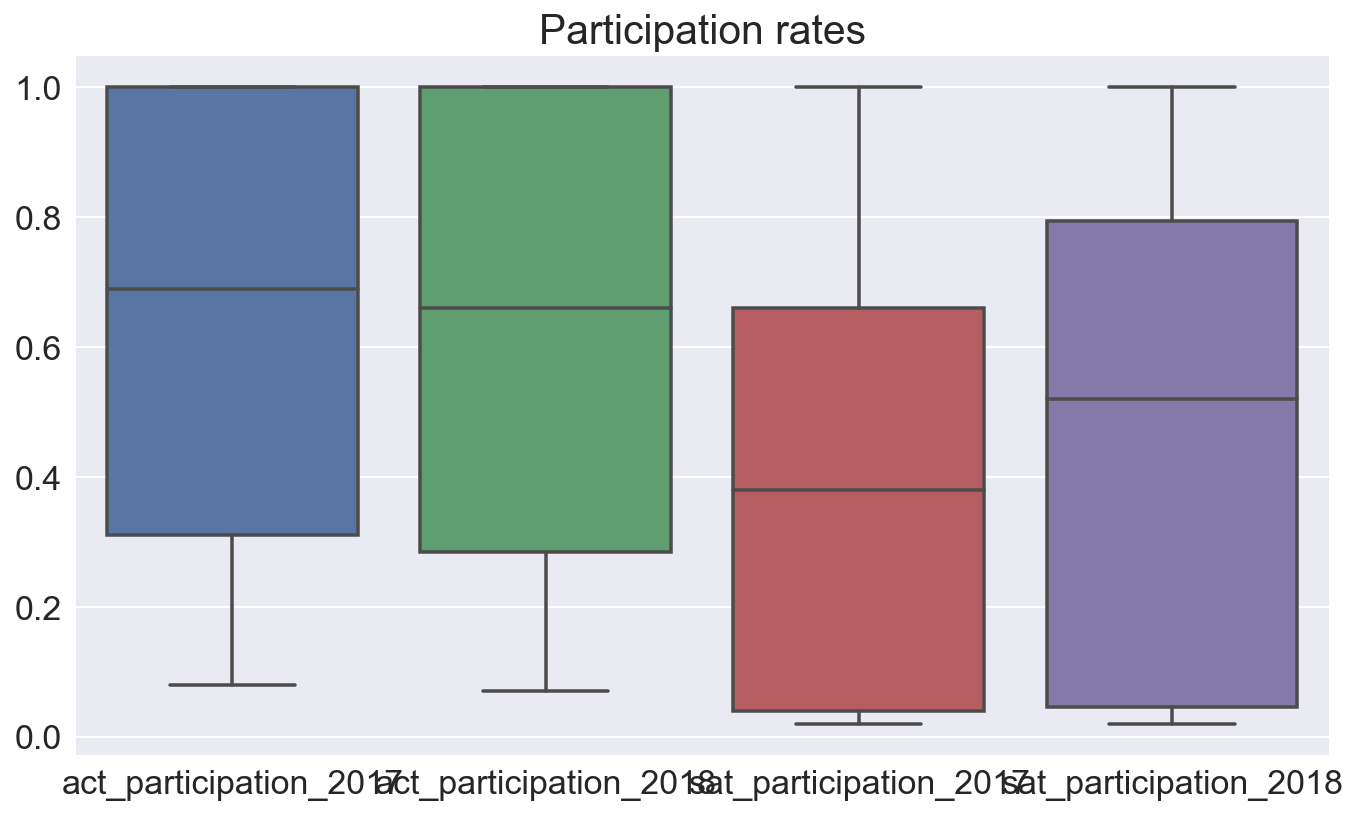

In [87]:
box_plot(comb,sorted([p for p in comb.columns if 'participation' in p]),'Participation rates',10,6)

In [88]:
s = [s for s in comb.columns if "math" in s]
s.extend([s for s in comb.columns if "reading" in s])

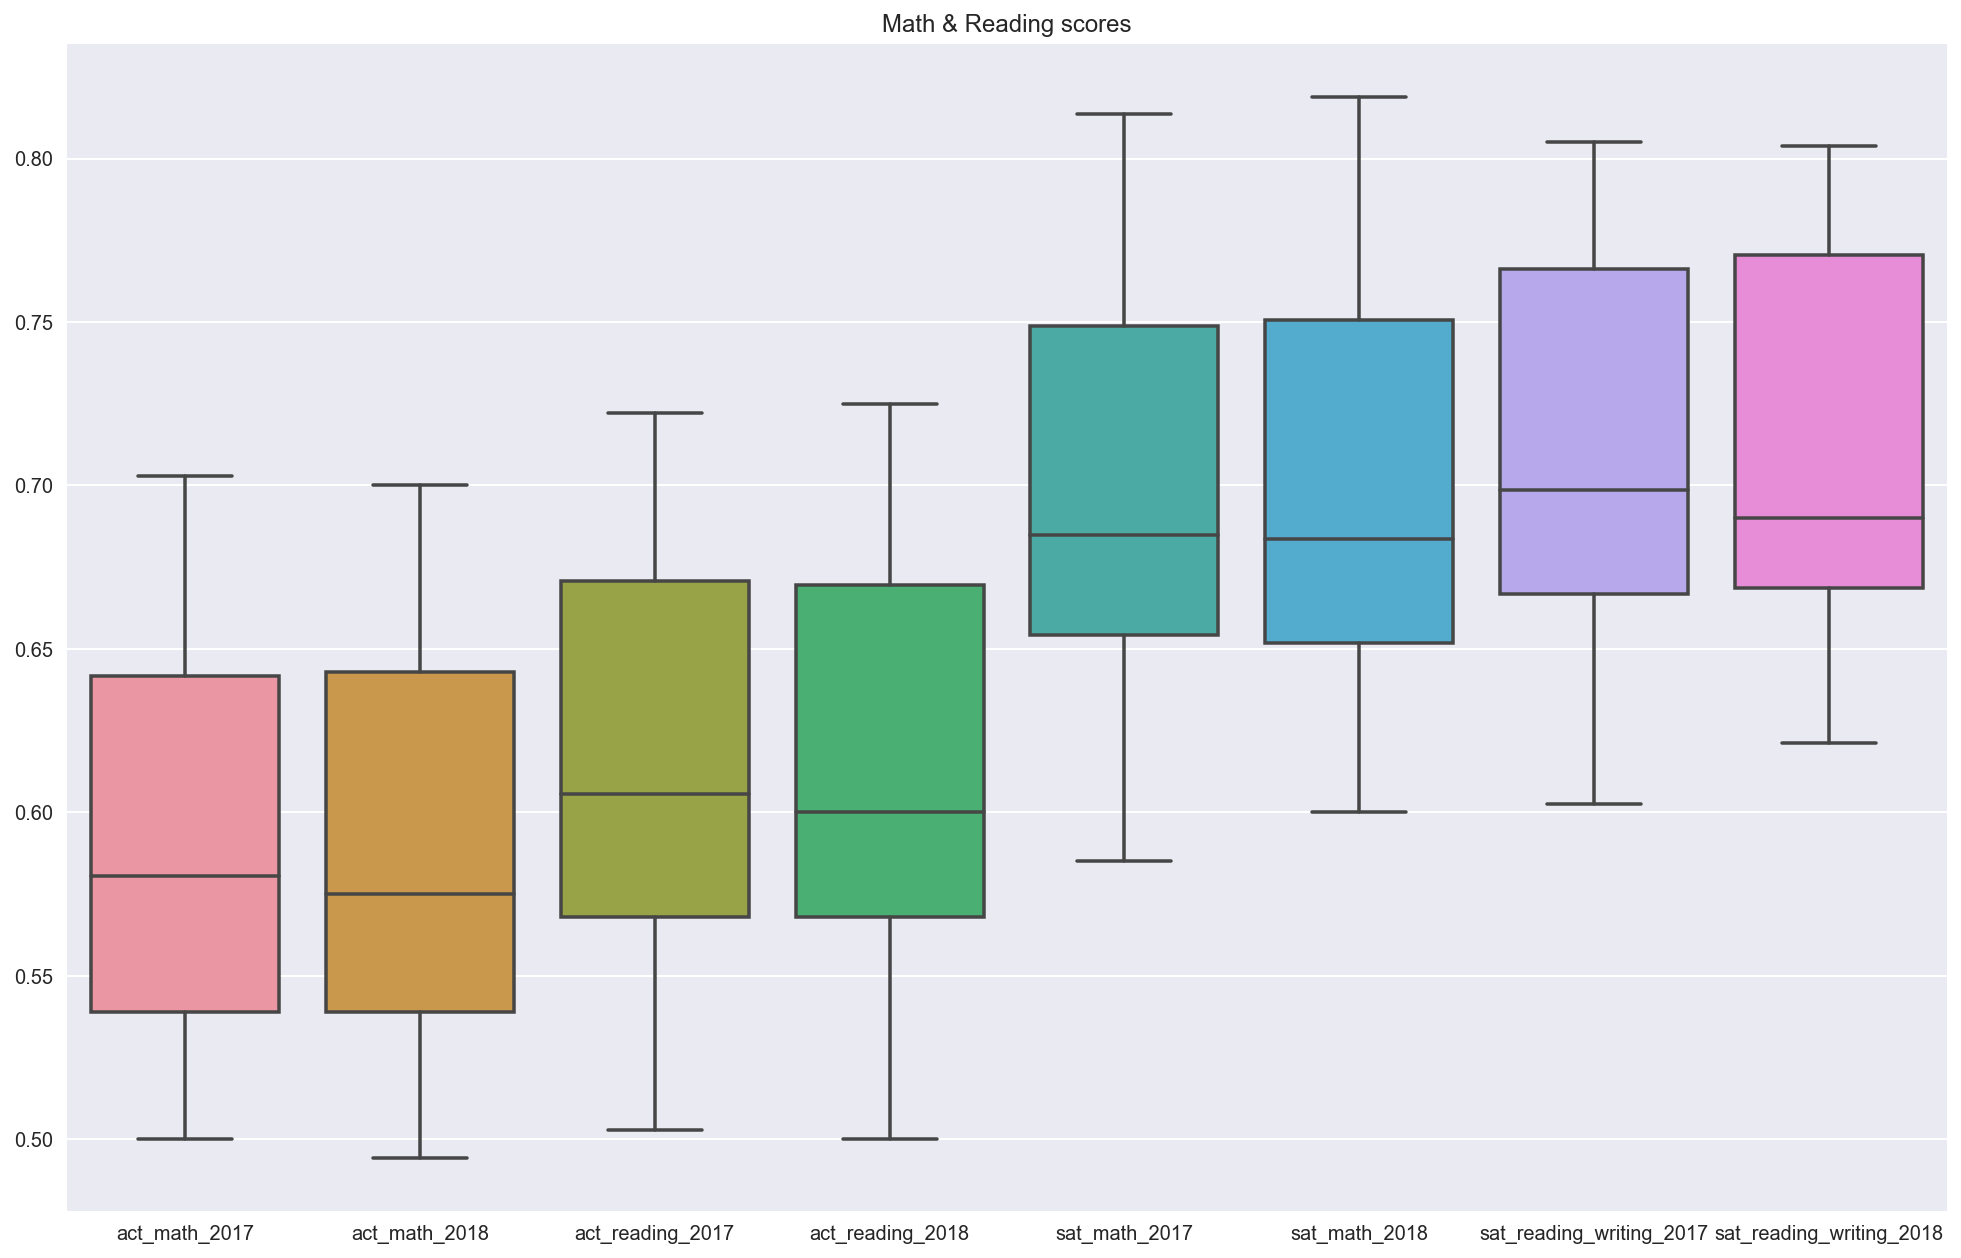

In [89]:
box_plot(comb,sorted(s),"Math & Reading scores",15,10)

In [90]:
s = [s for s in comb.columns if "total" in s]
s.extend([s for s in comb.columns if "composite" in s])

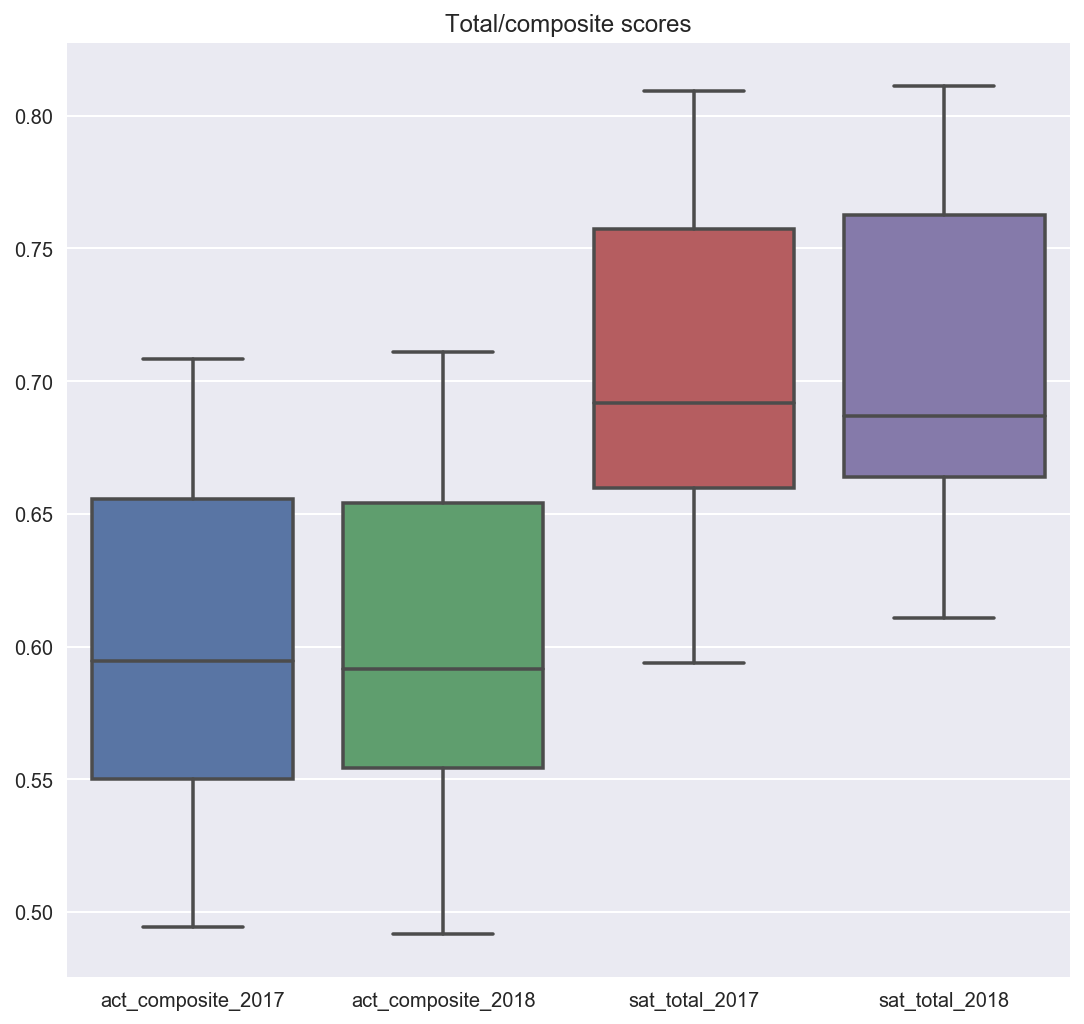

In [91]:
box_plot(comb,sorted(s),"Total/composite scores",8,8)

The box plots tell us pretty much what we expected from the histograms. The SAT test scores tend to be higher than ACT scores. No particular exam stands out with any noticeble difference from the others

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Let's look at participation data grouped by the "Test Required" column. The numbers in the column mean the following: 

ACT only mandatory : 1
SAT only mandatory : 2
Either SAT or ACT mandatory : 3
Neither mandatory : 0

In [92]:
c = comb.groupby('Test Required').mean()
c.index = ['Neither',"ACT Only","SAT Only","Either"]
c = c[[s for s in comb.columns if 'participation' in s]]
c = c[sorted(c.columns)]

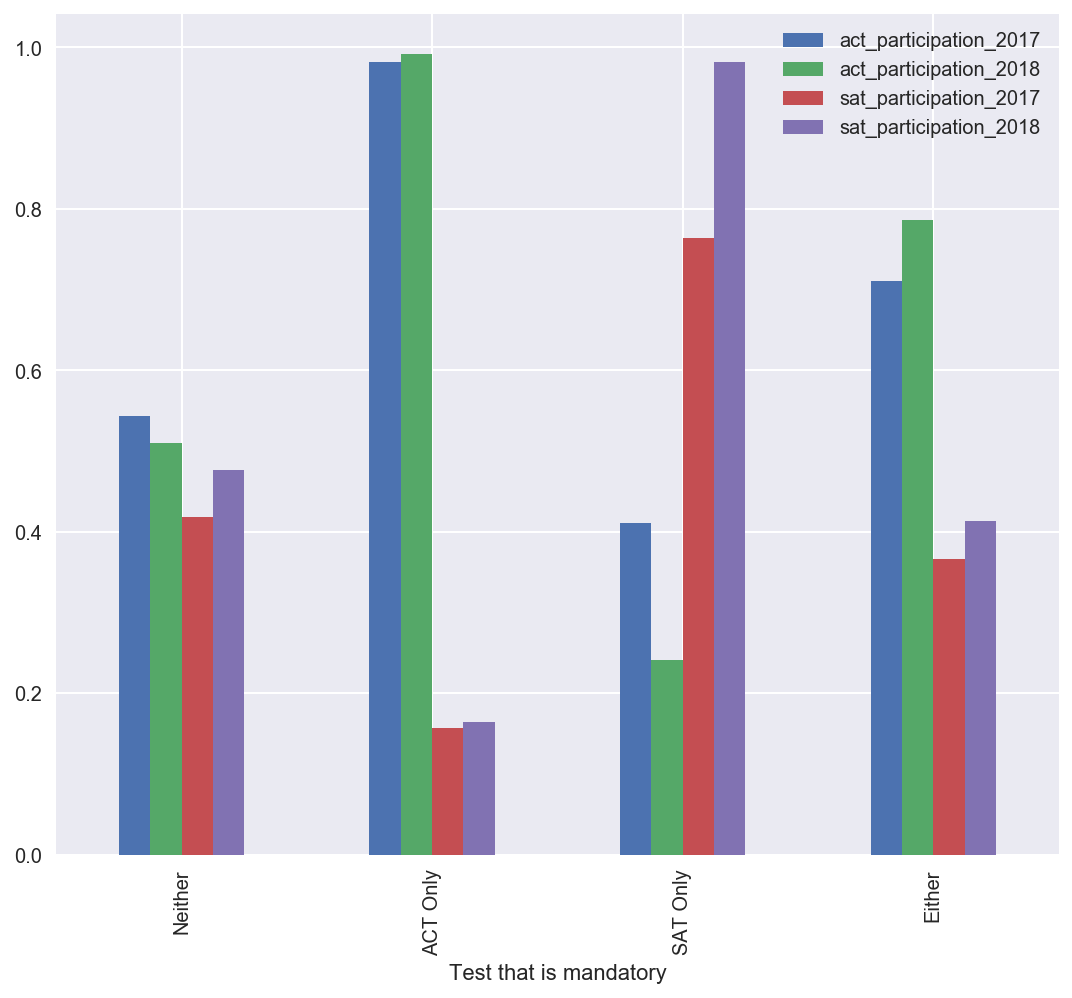

In [93]:
ax = c.plot(kind='bar',figsize=(8,8))
ax.set_xlabel("Test that is mandatory")
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('bar.png')
#plt.set_xticks(('Neither',"ACT Only","SAT Only","Either"))

From this bar plot, we learn that in states where either one of the tests is mandatory, both ACT & SAT participation rates are increasing, with ACT rates increasing by more than SAT is. However, in states where neither is mandatory, ACT participation rates are falling whilst SAT participation rates are increasing. This suggests that focusing on states where neither test is mandatory could be a good option

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [94]:
df = pd.DataFrame(columns=comb.columns[1:-1],index=['Mean',"Median","Skew","Standard Deviation"])

In [95]:
for c in df.columns:
    df.loc['Mean',c] = round(comb[c].mean(),4)
    #df.loc['Mode',c] = round(comb[c].mode(),4)
    df.loc['Median',c] = round(comb[c].median(),4)
    df.loc['Skew',c] = round(comb[c].skew(),4)
    #print(comb[c].std)
    df.loc["Standard Deviation",c] = round(comb[c].std(),4)
df

,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_reading_writing_2018,sat_math_2018,sat_total_2018,sat_participation_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
Mean,0.398,0.7114,0.6961,0.7038,0.6525,0.5814,0.5884,0.6115,0.5959,0.5978,0.7091,0.6966,0.7029,0.4663,0.6165,0.5968,0.583,0.5868,0.6115,0.5929
Median,0.38,0.6987,0.685,0.6919,0.69,0.575,0.5806,0.6056,0.5917,0.5944,0.69,0.6837,0.6869,0.52,0.66,0.5917,0.5611,0.575,0.6,0.5861
Skew,0.3464,0.2727,0.365,0.3109,-0.198,0.3527,0.3327,0.2694,0.2188,0.3198,0.3589,0.4237,0.3891,0.1087,-0.0219,0.282,0.3715,0.2695,0.2014,0.1724
Standard Deviation,0.3528,0.0571,0.0589,0.0578,0.3214,0.0654,0.0551,0.0574,0.0483,0.0561,0.0566,0.0611,0.0587,0.3801,0.3408,0.0585,0.068,0.0565,0.0602,0.0519


Participation rates: These are the most widely distributed data in the dataset. The 4 participation rate columns have standard deviation ranging from 0.32 to 0.38. The SAT participation rates both have a positive Skew, for 2017 it is 0.3464 and for 2018 it is 0.1087. Conversely, the ACT participation rates have a negative skew for both years, -0.198 in 2017 and -0.0219 in 2018. This tells us that there tend to be more states below the mean for ACT participation rates than for SAT. Only for 2017 SAT Participation is the Median below the mean, for all other participation rate data, the mean is lower than the median

In [96]:
df

,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_reading_writing_2018,sat_math_2018,sat_total_2018,sat_participation_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
Mean,0.398,0.7114,0.6961,0.7038,0.6525,0.5814,0.5884,0.6115,0.5959,0.5978,0.7091,0.6966,0.7029,0.4663,0.6165,0.5968,0.583,0.5868,0.6115,0.5929
Median,0.38,0.6987,0.685,0.6919,0.69,0.575,0.5806,0.6056,0.5917,0.5944,0.69,0.6837,0.6869,0.52,0.66,0.5917,0.5611,0.575,0.6,0.5861
Skew,0.3464,0.2727,0.365,0.3109,-0.198,0.3527,0.3327,0.2694,0.2188,0.3198,0.3589,0.4237,0.3891,0.1087,-0.0219,0.282,0.3715,0.2695,0.2014,0.1724
Standard Deviation,0.3528,0.0571,0.0589,0.0578,0.3214,0.0654,0.0551,0.0574,0.0483,0.0561,0.0566,0.0611,0.0587,0.3801,0.3408,0.0585,0.068,0.0565,0.0602,0.0519


Test result data: This data has far less variance than the participation rate data. The standard deviation for these 16 columns range from 0.048 to 0.068. All the columns have a positive skew, ranging from 0.1724 (for ACT Science 2018) to 0.4237 (for SAT Math 2018). Lets plot the distribution of these 2 columns to observe the difference 

We can see the difference between the above 2 plots is that for SAT Math 2018, more of the data lies to the right of the distribution than for the ACT Science 2018 data

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

We can plot the distribution of all the columns to visually check if the assumption holds

In [97]:
df

,sat_participation_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_reading_writing_2018,sat_math_2018,sat_total_2018,sat_participation_2018,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
Mean,0.398,0.7114,0.6961,0.7038,0.6525,0.5814,0.5884,0.6115,0.5959,0.5978,0.7091,0.6966,0.7029,0.4663,0.6165,0.5968,0.583,0.5868,0.6115,0.5929
Median,0.38,0.6987,0.685,0.6919,0.69,0.575,0.5806,0.6056,0.5917,0.5944,0.69,0.6837,0.6869,0.52,0.66,0.5917,0.5611,0.575,0.6,0.5861
Skew,0.3464,0.2727,0.365,0.3109,-0.198,0.3527,0.3327,0.2694,0.2188,0.3198,0.3589,0.4237,0.3891,0.1087,-0.0219,0.282,0.3715,0.2695,0.2014,0.1724
Standard Deviation,0.3528,0.0571,0.0589,0.0578,0.3214,0.0654,0.0551,0.0574,0.0483,0.0561,0.0566,0.0611,0.0587,0.3801,0.3408,0.0585,0.068,0.0565,0.0602,0.0519


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'n

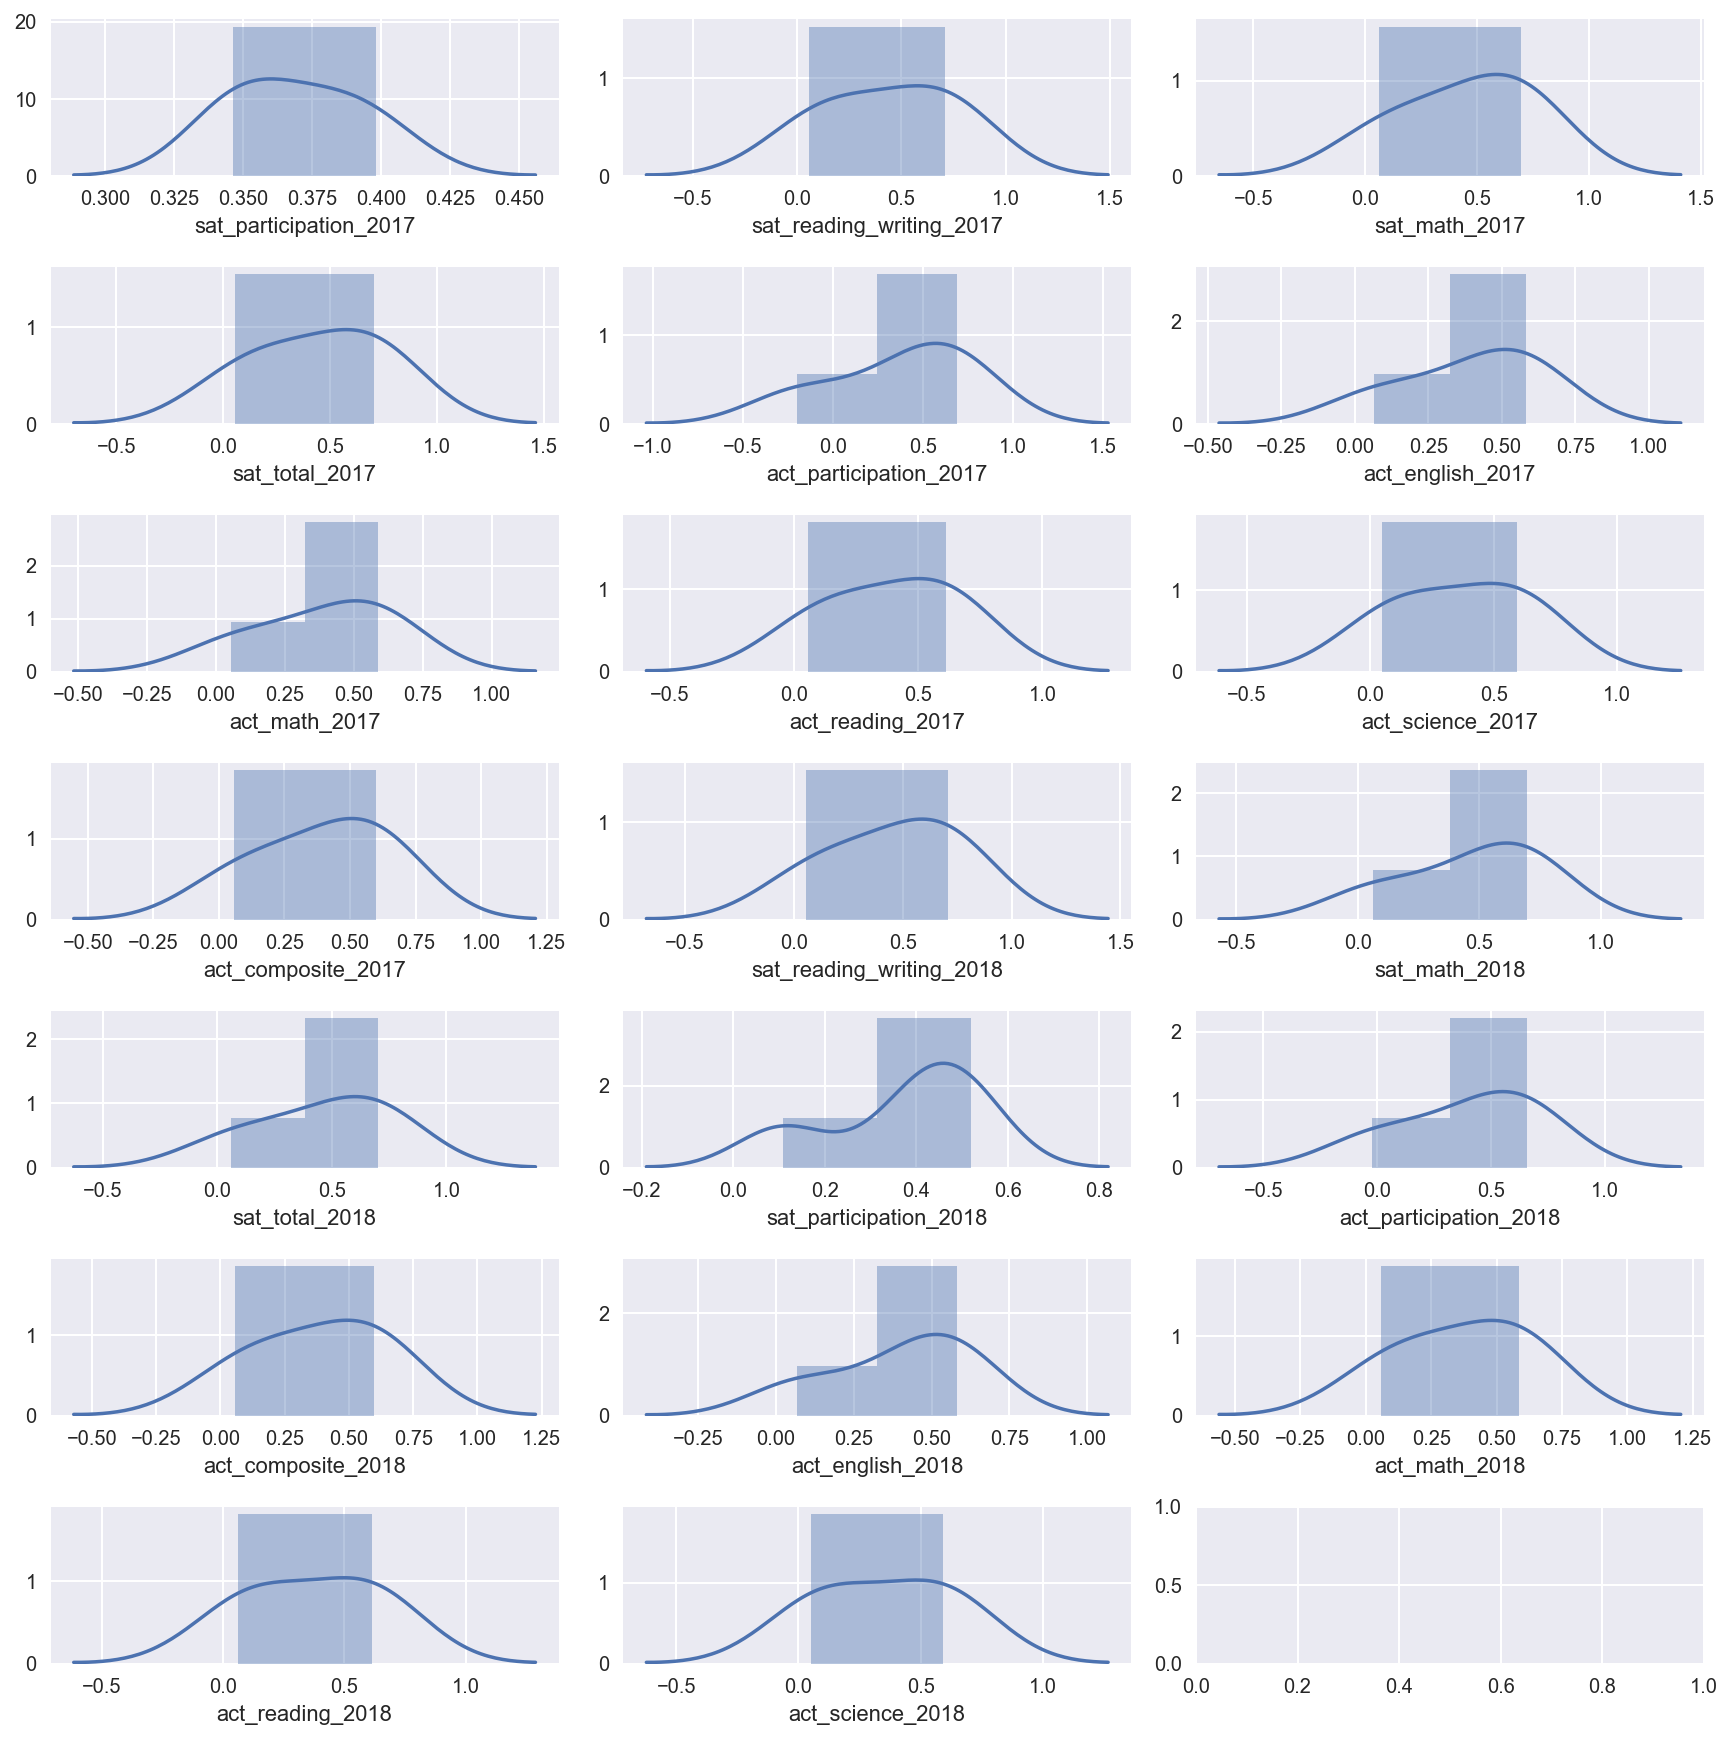

In [98]:
fig, axes = plt.subplots(figsize=(12,12),nrows=7, ncols=3)
sns.reset_orig
for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=axes[i//3,i%3])
    ax.set_title(column + str(round(stats.normaltest(comb[c])[1],5)))
plt.subplots_adjust(top = 1, bottom=0.01, hspace=0.5, wspace=0.1)
plt.gcf().subplots_adjust(bottom=0.07)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('dists.png')

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

From visually observing the distribution plots, the assumptions does not really hold for Math, Reading or the participation rates. Estimates made using the normla curve for these columns are unlikely to be accurate

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

As these are the only 2 standardised tests used for college entrances in the US, it would make sense to use statistical inference for their partcipation rate data. Any high school graduate hoping to enter college will be sitting for either one or both tests so data on participation rates of one test will allow us to make inferences on participation rates of the other test

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

It is probably not as appropriate to compare SAT and ACT math scores as it is to compare participation rates. Our data has shown us that the scores for the specific subjects to vary significantly between the SAT & ACT. Having data for one of the scores will not give us any good evidence for data on the other test.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Test the null hypothesis that the data is normally distributed

In [99]:
from scipy import stats
reject = []
not_reject = []
for c in comb.columns[1:-1]:
    
    p = stats.normaltest(comb[c])[1]
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
         #print("For column {} the null hypothesis can be rejected".format(c))
        reject.append(c)
    else:
        not_reject.append(c)
        #print("The null hypothesis cannot be rejected")
not_reject

['sat_math_2017', 'act_english_2017', 'act_science_2017']

Using a p-value of 5%, The null hypothesis that the data comes from a normal distribution cannot be rejected for the following columns:

sat_math_2017
act_english_2017
act_science_2017

For the other columns, the hypothesis should be rejected


## Outside Research

I have used the table on this website to identify the mandatory test in each state (if any): https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/

This information together with the participation trend from 2017 to 2018 has lead me to focus on states where neither test is mandatory and where there has been a marked increase in SAT participation rate from 2017 to 2018

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [100]:
comb.columns

Index(['state', 'sat_participation_2017', 'sat_reading_writing_2017',
       'sat_math_2017', 'sat_total_2017', 'act_participation_2017',
       'act_english_2017', 'act_math_2017', 'act_reading_2017',
       'act_science_2017', 'act_composite_2017', 'sat_reading_writing_2018',
       'sat_math_2018', 'sat_total_2018', 'sat_participation_2018',
       'act_participation_2018', 'act_composite_2018', 'act_english_2018',
       'act_math_2018', 'act_reading_2018', 'act_science_2018',
       'Test Required'],
      dtype='object')

In [101]:
cols =[s for s in comb.columns if 'participation' in s]
cols.append('Test Required')
cols.insert(0,'state')
df = comb[cols]

In [102]:
df.columns

Index(['state', 'sat_participation_2017', 'act_participation_2017',
       'sat_participation_2018', 'act_participation_2018', 'Test Required'],
      dtype='object')

In [103]:
df['SAT Yearly change'] = df['sat_participation_2018']-df['sat_participation_2017']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The 3 states will be chosen using the following criteria:
1. Neither the SAT or ACT is mandatory - Data has shown that in these states, ACT participation is decreasing and SAT participation is increasing
2. 2018 sat_participation is less than 80% - This leaves room for the added resources to have a larger impact
3. States matching the above 2 with the highest increase in participation rate from 2017 to 2018

In [104]:
df.loc[(df['Test Required'] ==0)&(df['sat_participation_2018']<=0.80)].sort_values("SAT Yearly change",ascending=False).reset_index(drop=True).loc[0:2]



,state,sat_participation_2017,act_participation_2017,sat_participation_2018,act_participation_2018,Test Required,SAT Yearly change
0,West Virginia,0.14,0.69,0.28,0.65,0,0.14
1,New York,0.67,0.31,0.79,0.27,0,0.12
2,Georgia,0.61,0.55,0.70,0.53,0,0.09


In [105]:
df

,state,sat_participation_2017,act_participation_2017,sat_participation_2018,act_participation_2018,Test Required,SAT Yearly change
0,Alabama,0.05,1.00,0.06,1.00,1,0.01
1,Alaska,0.38,0.65,0.43,0.33,0,0.05
2,Arizona,0.30,0.62,0.29,0.66,0,-0.01
3,Arkansas,0.03,1.00,0.05,1.00,0,0.02
4,California,0.53,0.31,0.60,0.27,0,0.07
5,Colorado,0.11,1.00,1.00,0.30,2,0.89
6,Connecticut,1.00,0.31,1.00,0.26,2,0.00
7,Delaware,1.00,0.18,1.00,0.17,2,0.00
8,District of Columbia,1.00,0.32,0.92,0.32,2,-0.08
9,Florida,0.83,0.73,0.97,0.66,0,0.14


In [106]:
df.loc[(df['Test Required'] ==0)&(df['sat_participation_2018']<=0.80)].sort_values("SAT Yearly change",ascending=False).reset_index(drop=True)



,state,sat_participation_2017,act_participation_2017,sat_participation_2018,act_participation_2018,Test Required,SAT Yearly change
0,West Virginia,0.14,0.69,0.28,0.65,0,0.14
1,New York,0.67,0.31,0.79,0.27,0,0.12
2,Georgia,0.61,0.55,0.70,0.53,0,0.09
3,Maryland,0.69,0.28,0.76,0.31,0,0.07
4,California,0.53,0.31,0.60,0.27,0,0.07
5,New Mexico,0.11,0.66,0.16,0.67,0,0.05
6,Alaska,0.38,0.65,0.43,0.33,0,0.05
7,Oregon,0.43,0.40,0.48,0.42,0,0.05
8,Washington,0.64,0.29,0.69,0.24,0,0.05
9,Pennsylvania,0.65,0.23,0.70,0.20,0,0.05


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

The 3 states that the College Board should focus on are West Virginia, New York & Georgia. In particular, West Virginia has great potential to see a large increase in SAT participation rates. The participation rate in 2017 was only 14%, this doubled to 28% in 2018, whilst the ACT participation rate decreased from 69% to 65%. This indicates a trend in the state for students to be moving from the ACT to SAT. Focusing some resources on that state could see this trend significantly boosted. A program to publicise and advertise the revamped SAT and highlight it's benefits to graduating students would most likely be effective in boosting participation rates in the state.

Data on the allocation of resources over the past 2 years would have been useful in this project as it would have allowed us to see which states have been the most and least responsive to a change in resources. 